## Project 6 (Chapter 5) Probability Distributions

add in notes from project 6

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# np.linspace(a,b,ndiv) create a line from a to be with the 
## number of divisions ndiv (its cutting 1000 pieces)
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
mean = 0
sd = 1
x = np.linspace(-10,10,1000)
y = normal_dist(mean, sd, x = x)
y

array([7.69459863e-23, 9.39820210e-23, 1.14743878e-22, 1.40036163e-22,
       1.70834985e-22, 2.08324026e-22, 2.53938085e-22, 3.09415635e-22,
       3.76862222e-22, 4.58826917e-22, 5.58394466e-22, 6.79296313e-22,
       8.26044309e-22, 1.00409167e-21, 1.22002665e-21, 1.48180552e-21,
       1.79903259e-21, 2.18329685e-21, 2.64857624e-21, 3.21172317e-21,
       3.89304716e-21, 4.71701394e-21, 5.71308372e-21, 6.91671611e-21,
       8.37057415e-21, 1.01259663e-20, 1.22445730e-20, 1.48005122e-20,
       1.78828107e-20, 2.15983586e-20, 2.60754403e-20, 3.14679525e-20,
       3.79604417e-20, 4.57741157e-20, 5.51740168e-20, 6.64775762e-20,
       8.00648113e-20, 9.63904764e-20, 1.15998535e-19, 1.39539388e-19,
       1.67790381e-19, 2.01680189e-19, 2.42317820e-19, 2.91027079e-19,
       3.49387515e-19, 4.19283043e-19, 5.02959655e-19, 6.03093898e-19,
       7.22874081e-19, 8.66096546e-19, 1.03727974e-18, 1.24179931e-18,
       1.48604812e-18, 1.77762546e-18, 2.12556107e-18, 2.54057983e-18,
      

In [2]:
norm_df = pd.DataFrame([x,y], index = ["x","y"]).T
norm_df = norm_df.set_index("x")
norm_df.loc[-.05:0.05]

,y
x,
-0.03003,0.398762
-0.01001,0.398922
0.01001,0.398922
0.03003,0.398762


<Axes: xlabel='x'>

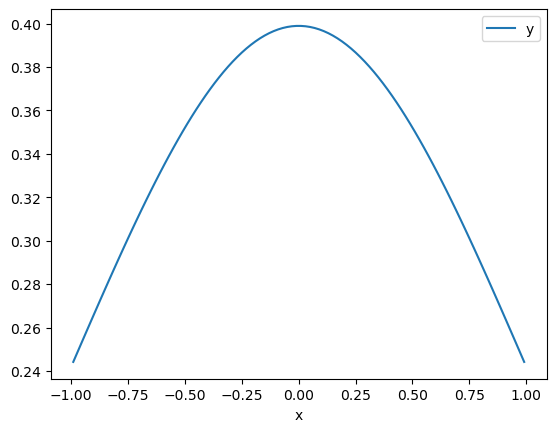

In [3]:
norm_df.loc[-1:1].plot()

ZeroDivisionError: float division by zero

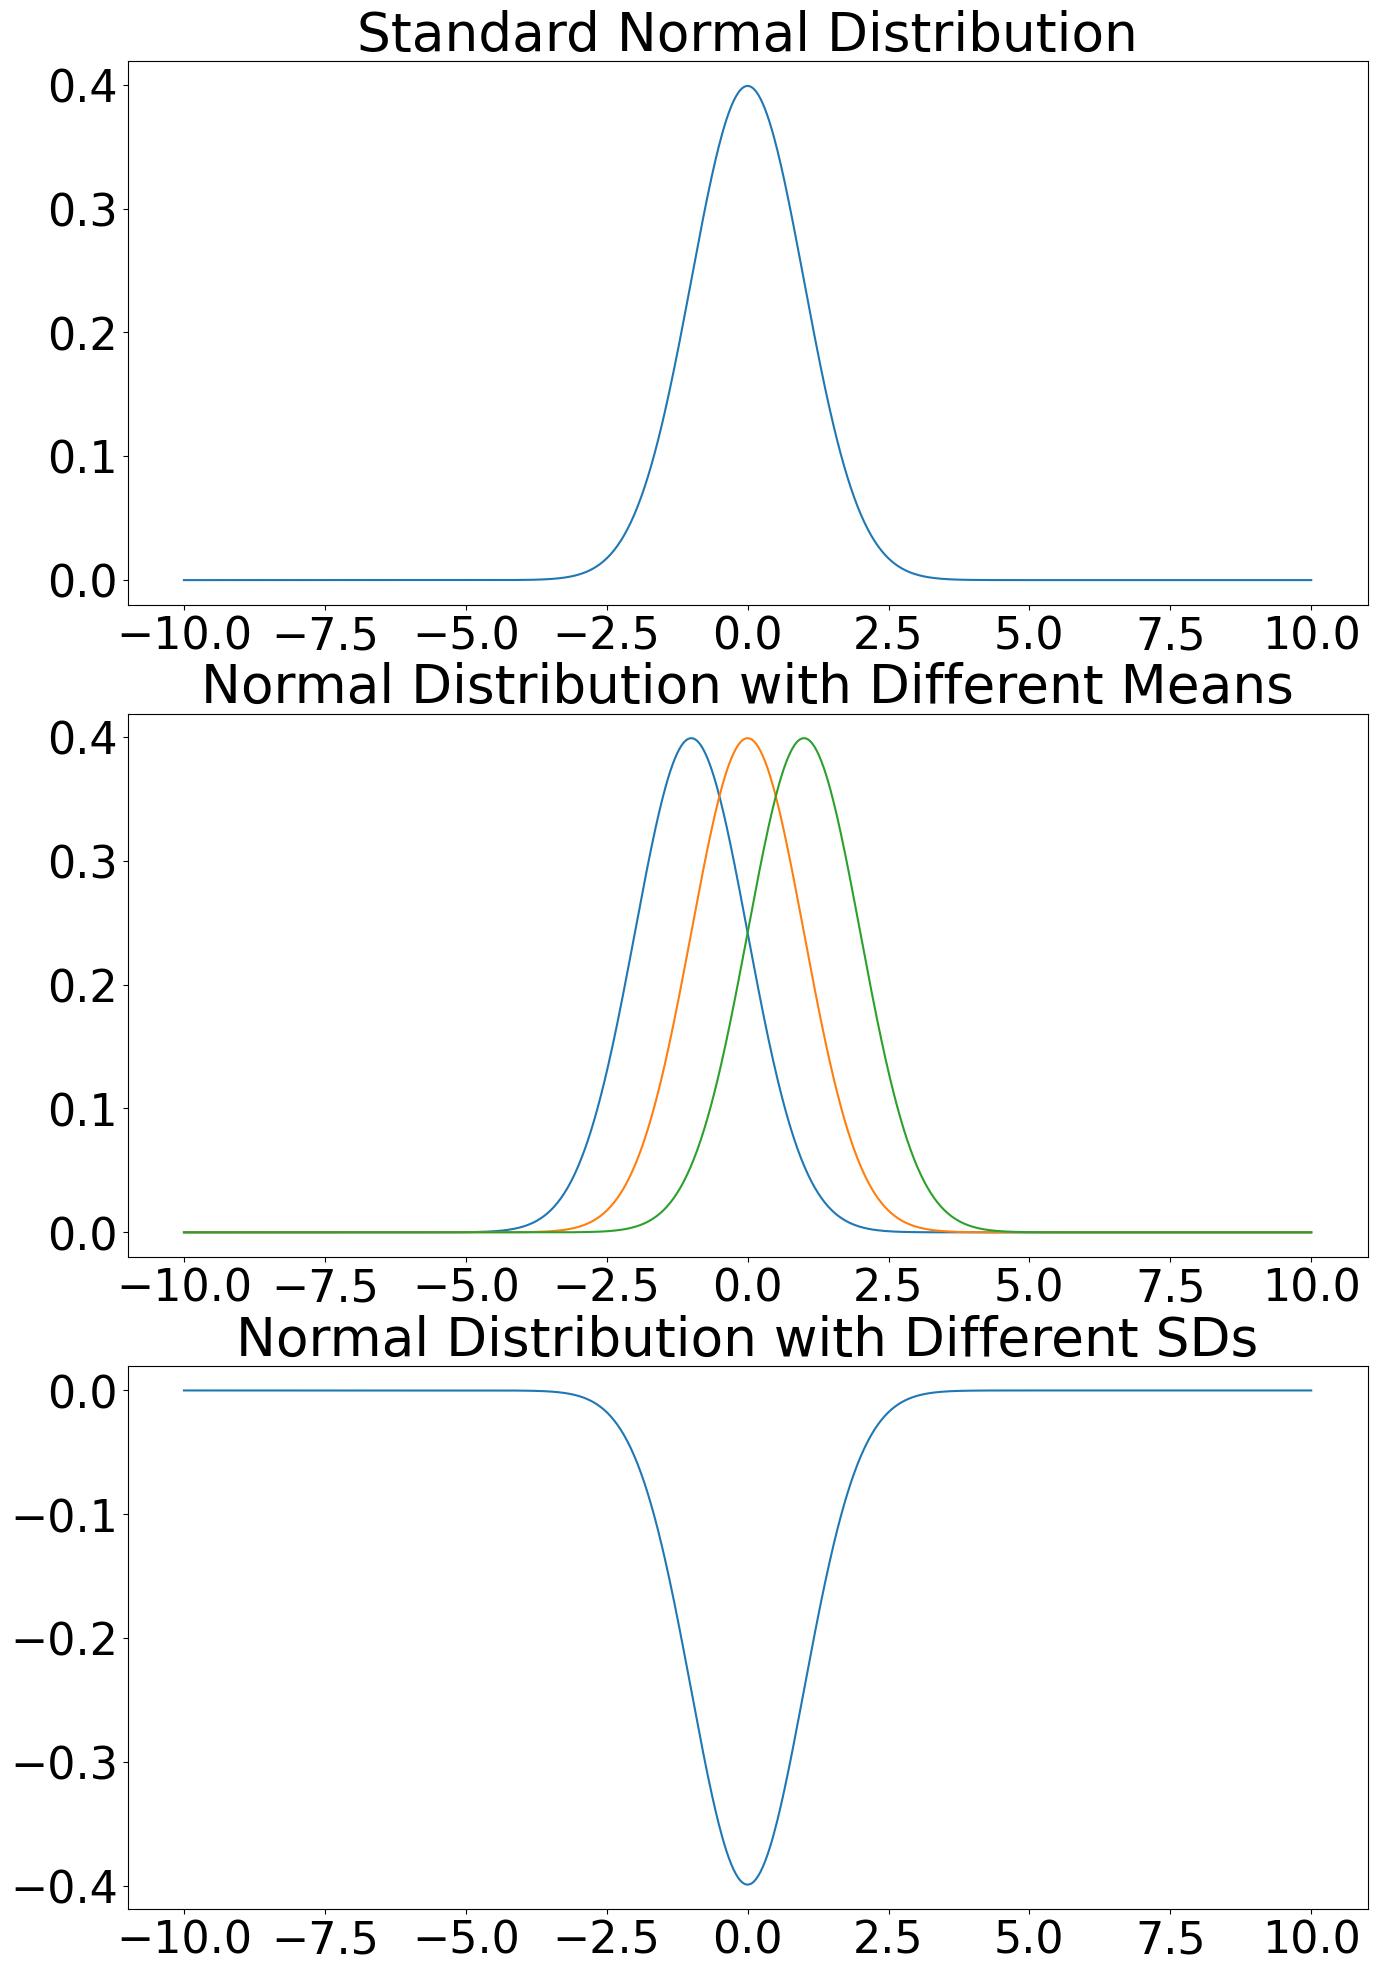

In [4]:
plt.rcParams.update({'font.size': 32})

# create a multiplot that has 3 stacked visualizatoin
## axs will have indices 0,1,2
fig, axs = plt.subplots(3,1, figsize = (16, 24))
normal_dist_list = normal_dist(mean = 0, sd = 1)

## in plot 0, only create a standard normal distribution with 
### mean = 0 and sd = 1
axs[0].plot(x, normal_dist_list)
axs[0].set_title("Standard Normal Distribution")

# in plot 1, create 3 distributions with means of -1,0,1 and sd =1
for mean_ in range(-1,1+1,1):
    normal_dist_list = normal_dist(mean = mean_, sd = 1)
    axs[1].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[1].set_title("Normal Distribution with Different Means")

    # in plot 2, create 3 distribution with mean = 0 and sds of 1,2,3
for sd_ in range(-1,4):
    normal_dist_list = normal_dist(mean = 0, sd = sd_)
    axs[2].plot(x, normal_dist_list, label = "Normal Distribution")
    axs[2].set_title("Normal Distribution with Different SDs")

## Lognormal Distribution
The probability density function of the distribution is:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>f</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mi>x</mi>
      <mi>&#x3C3;</mi>
      <msqrt>
        <mn>2</mn>
        <mi>&#x3C0;</mi>
      </msqrt>
    </mrow>
  </mfrac>
  <msup>
    <mi>e</mi>
    <mrow data-mjx-texclass="ORD">
      <mfrac>
        <mrow>
          <mo>&#x2212;</mo>
          <mo stretchy="false">(</mo>
          <mi>l</mi>
          <mi>n</mi>
          <mi>x</mi>
          <mo>&#x2212;</mo>
          <mi>&#x3BC;</mi>
          <msup>
            <mo stretchy="false">)</mo>
            <mn>2</mn>
          </msup>
        </mrow>
        <mrow>
          <mn>2</mn>
          <msup>
            <mi>&#x3C3;</mi>
            <mn>2</mn>
          </msup>
        </mrow>
      </mfrac>
    </mrow>
  </msup>
</math>

C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\568716364.py:2: RuntimeWarning: divide by zero encountered in divide
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(-(np.log(x) - mean)**2 / (2*sd **2))
C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\568716364.py:2: RuntimeWarning: divide by zero encountered in log
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(-(np.log(x) - mean)**2 / (2*sd **2))
C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\568716364.py:2: RuntimeWarning: invalid value encountered in multiply
  prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(-(np.log(x) - mean)**2 / (2*sd **2))


Text(0.5, 1.0, 'Log Normal Distribution with Logged x-axis')

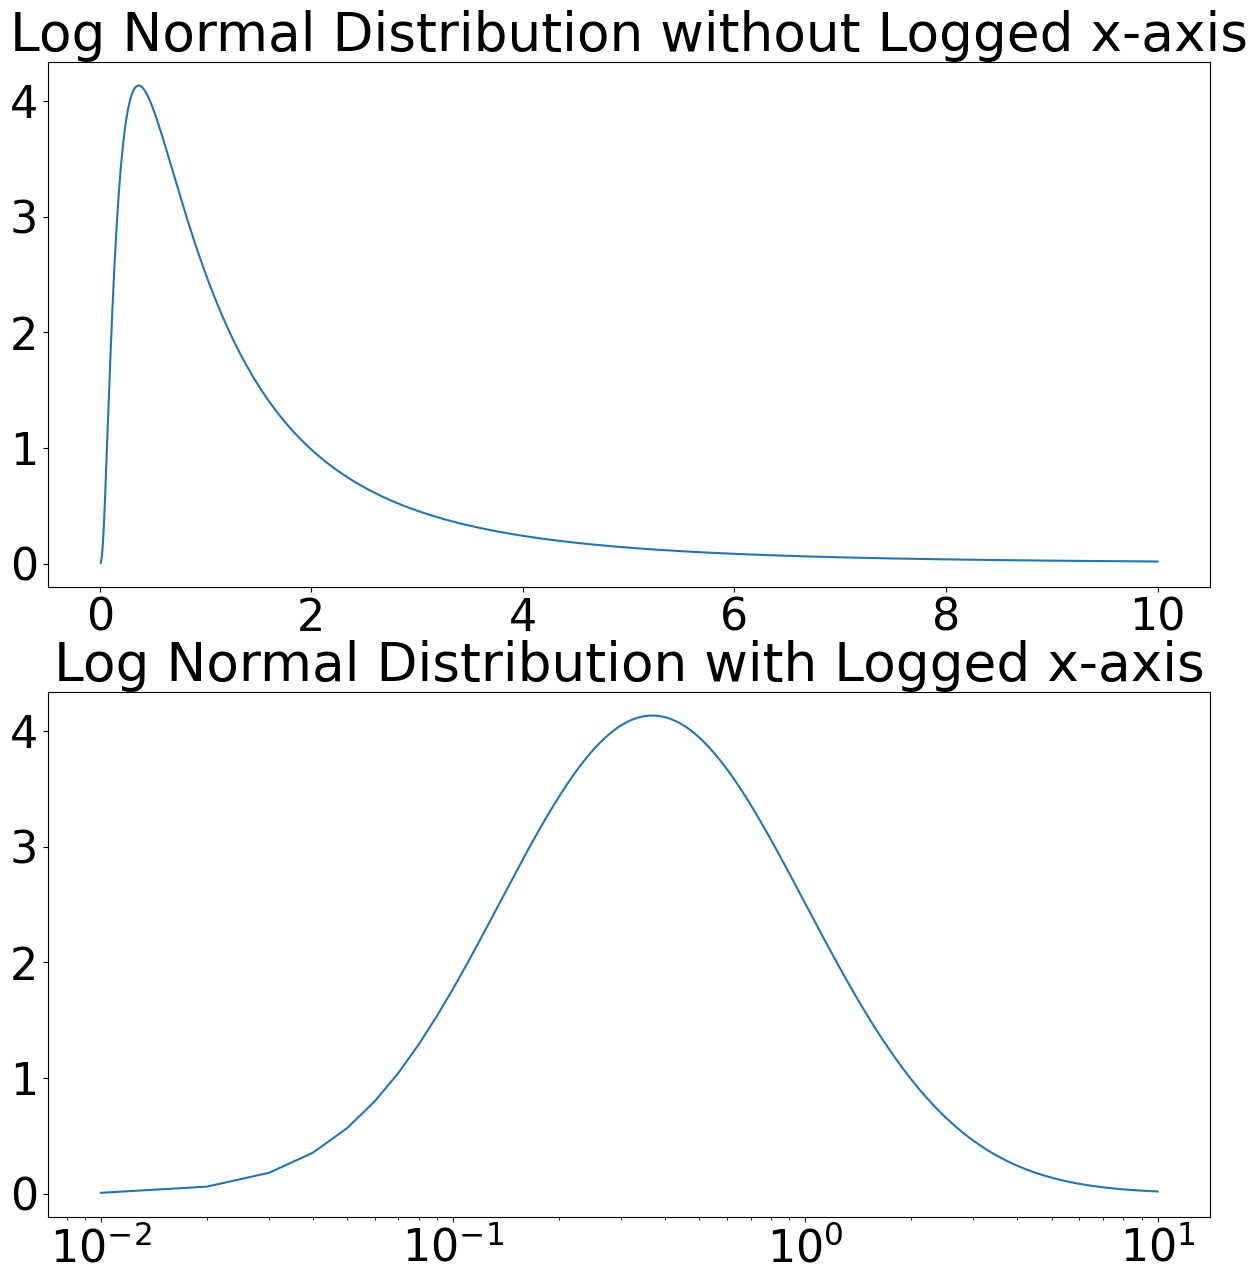

In [5]:
def create_lognormal(mean, sd, x = np.linspace(0,10,1000)):
    prob_density = (1 / x * sd * np.sqrt(2*math.pi))*math.e**(-(np.log(x) - mean)**2 / (2*sd **2))
    return prob_density

# start linspace from 0; log(0) will be a null value, but the next value will not be null
x = np.linspace(0,10,1000)
lognorm = create_lognormal(0,1,x)
fig, axs = plt.subplots(2,1, figsize = (15,15))
axs[0].plot(x, lognorm)
axs[0].set_title("Log Normal Distribution without Logged x-axis")
axs[1].plot(x, lognorm)
axs[1].set_xscale("log")
axs[1].set_title("Log Normal Distribution with Logged x-axis")

Binominal

copy paste from notes

In [6]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

yf.pdr_override()
start = datetime.datetime(2012,1,1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)

C:\Users\aleah\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
data_dict["AAPL"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639430,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771562,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400


In [8]:
# pd.concatenate will join a list of series values wither vertically (axis - 0)
## or join them horizontally (axis = 1)
close_data = pd.concat([val["Close"] for val in data_dict.values()],
                       # keys dictionary should be in the same order as each relevant "Close series"
                      keys = data_dict.keys(),
                      axis = 1)
close_data

,MSFT,AAPL,PG,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,66.830002,1.872000
2012-01-04,27.400000,14.765714,66.800003,1.847333
2012-01-05,27.680000,14.929643,66.519997,1.808000
2012-01-06,28.110001,15.085714,66.360001,1.794000
2012-01-09,27.740000,15.061786,66.639999,1.816667
...,...,...,...,...
2024-02-14,409.489990,184.149994,155.630005,188.710007
2024-02-15,406.559998,183.860001,157.009995,200.449997
2024-02-16,404.059998,182.309998,157.509995,199.949997


Text(0.5, 1.0, 'Daily Stock Prices')

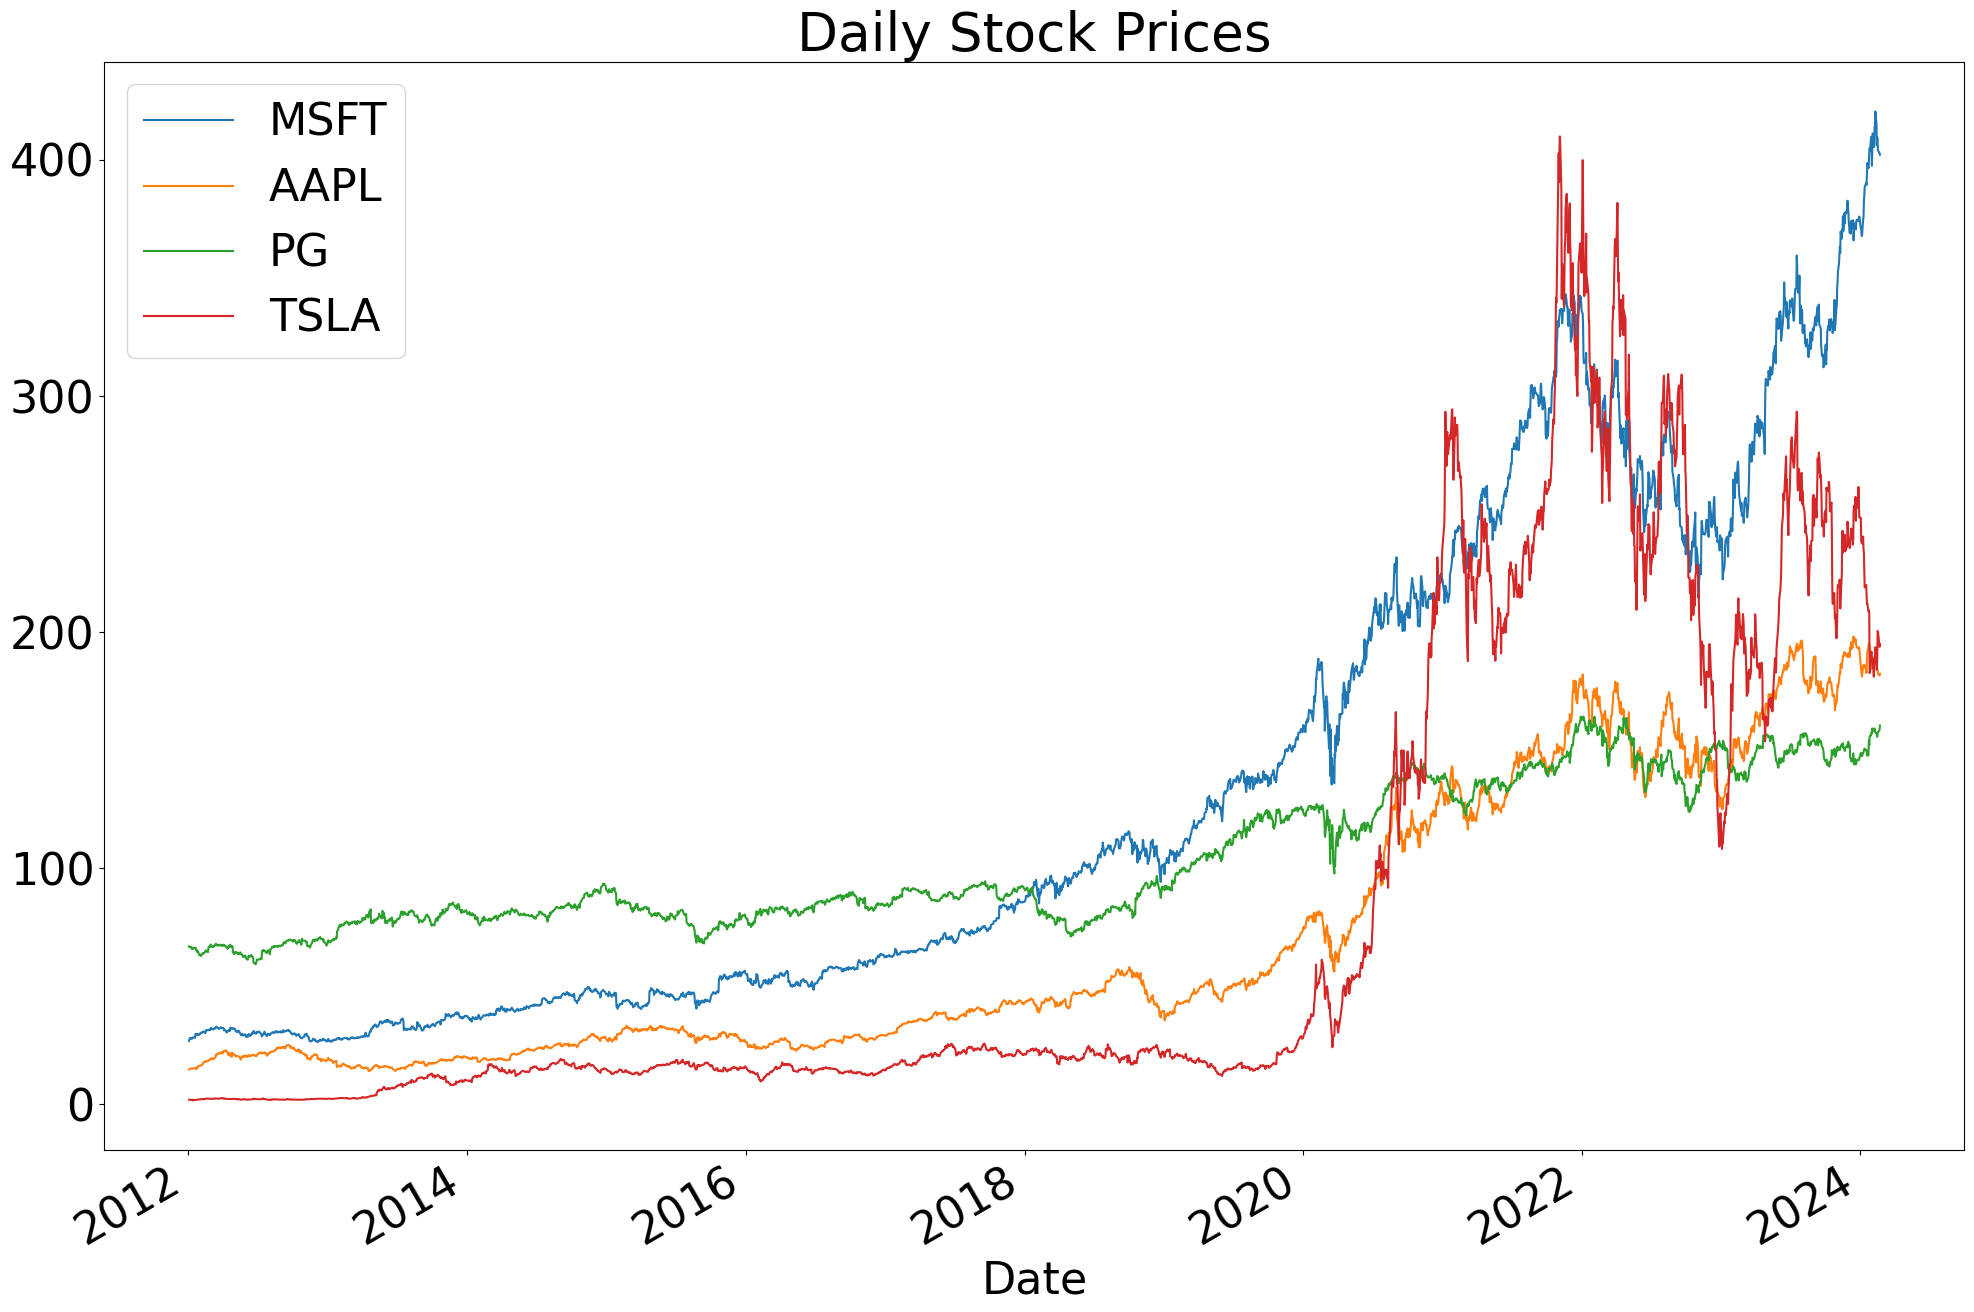

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend = True, ax = ax)
ax.set_title("Daily Stock Prices")

### Logging data helps compare relative changes

C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\1626289330.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) for y in y_vals])


[Text(0, 0.1, '0'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

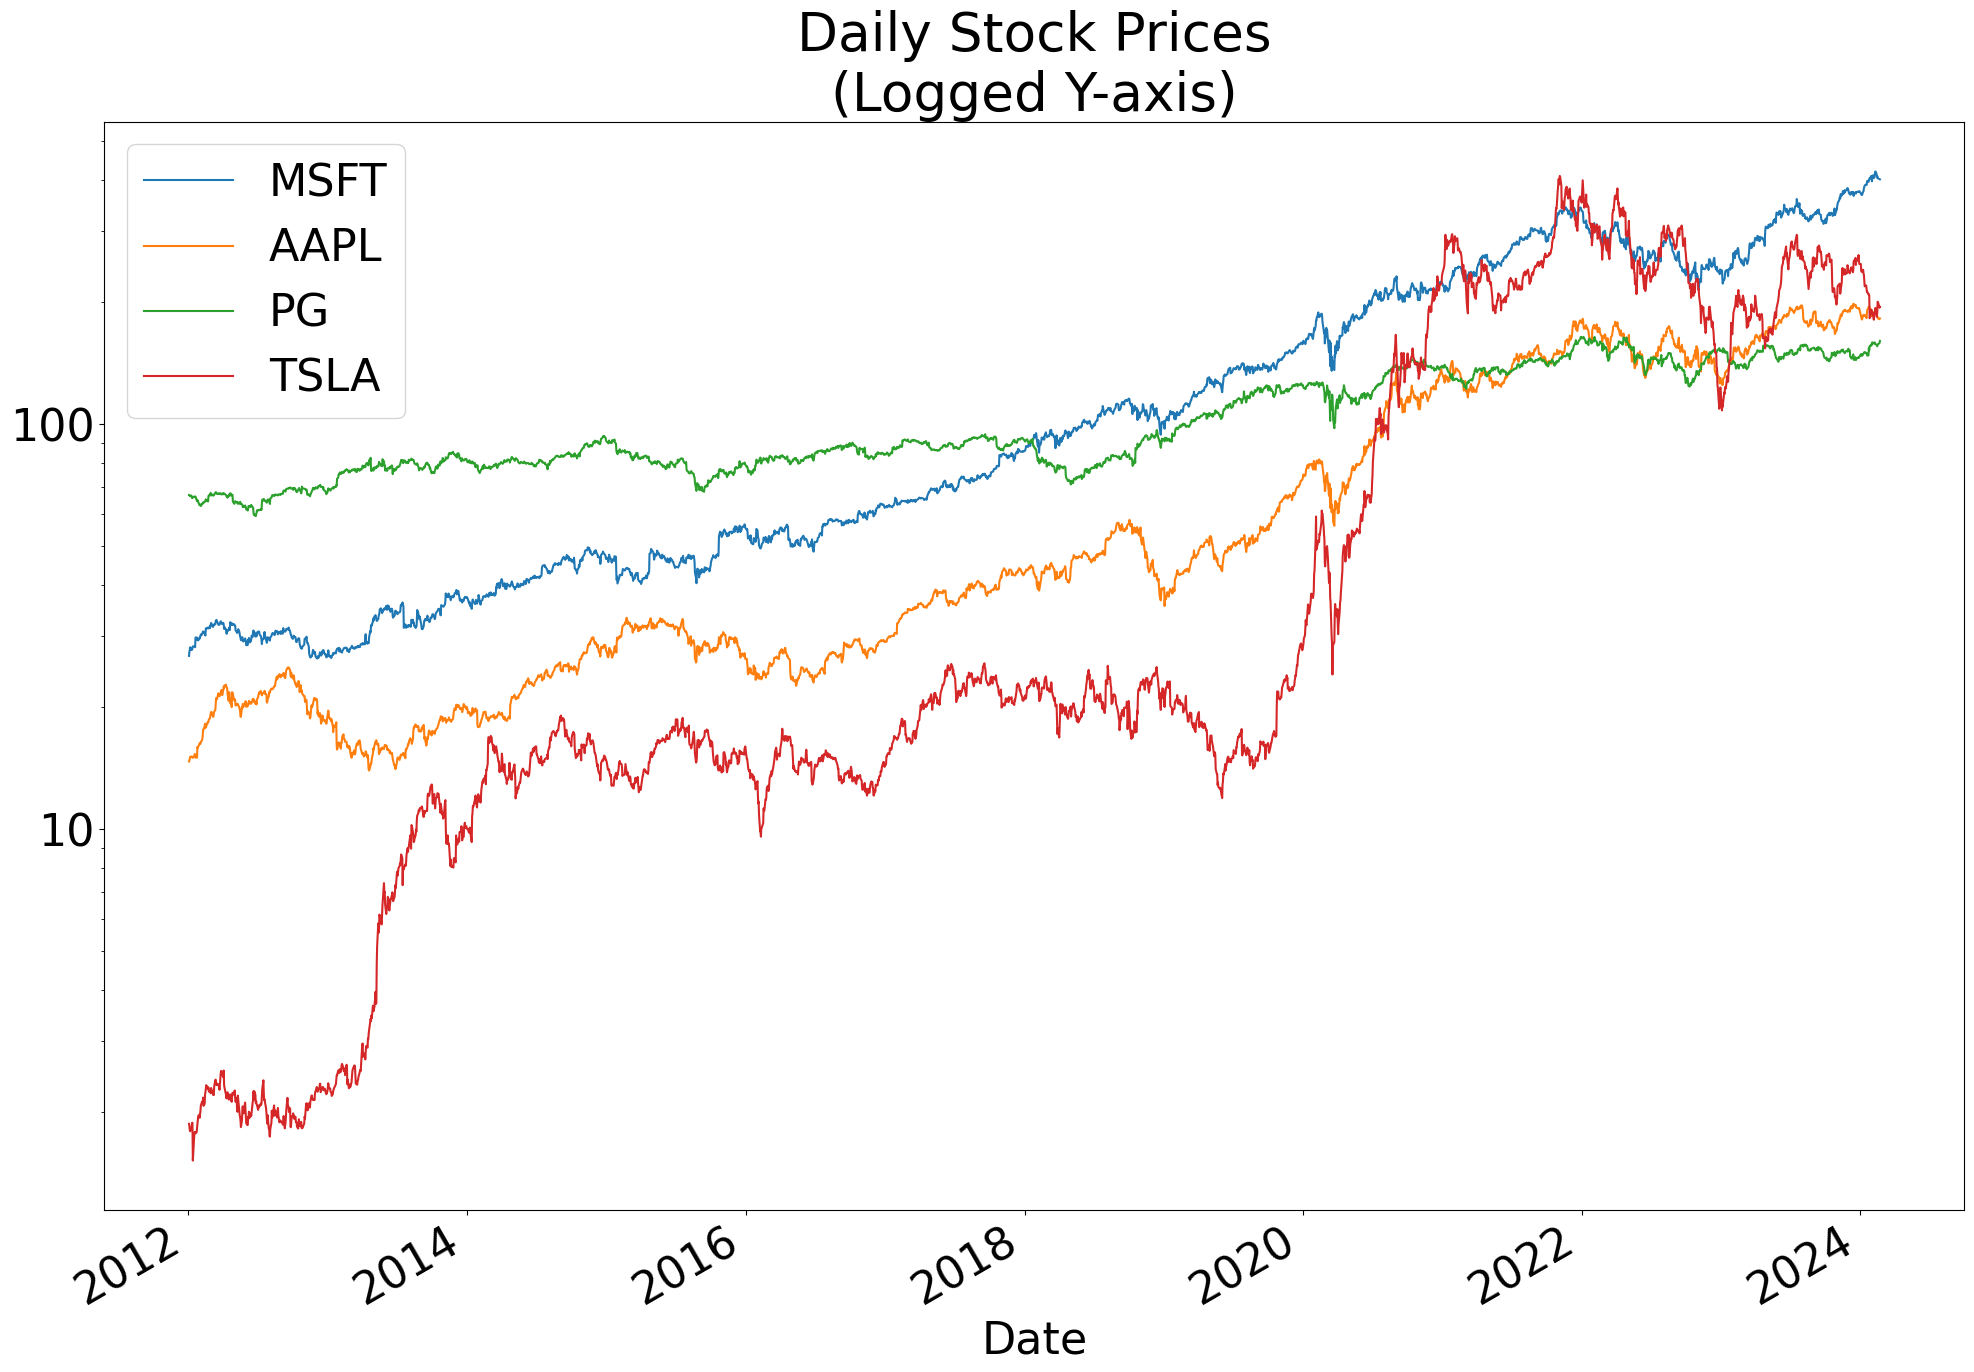

In [10]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(legend = True, ax = ax)
ax.set_title("Daily Stock Prices\n(Logged Y-axis)")
ax.set_yscale("log")
# reset y labels to integer (get rid of scientific notation)
y_vals = ax.get_yticks()
# use generator to transform each y value into an integer
ax.set_yticklabels([int(y) for y in y_vals])

Proposal is due this week!!!

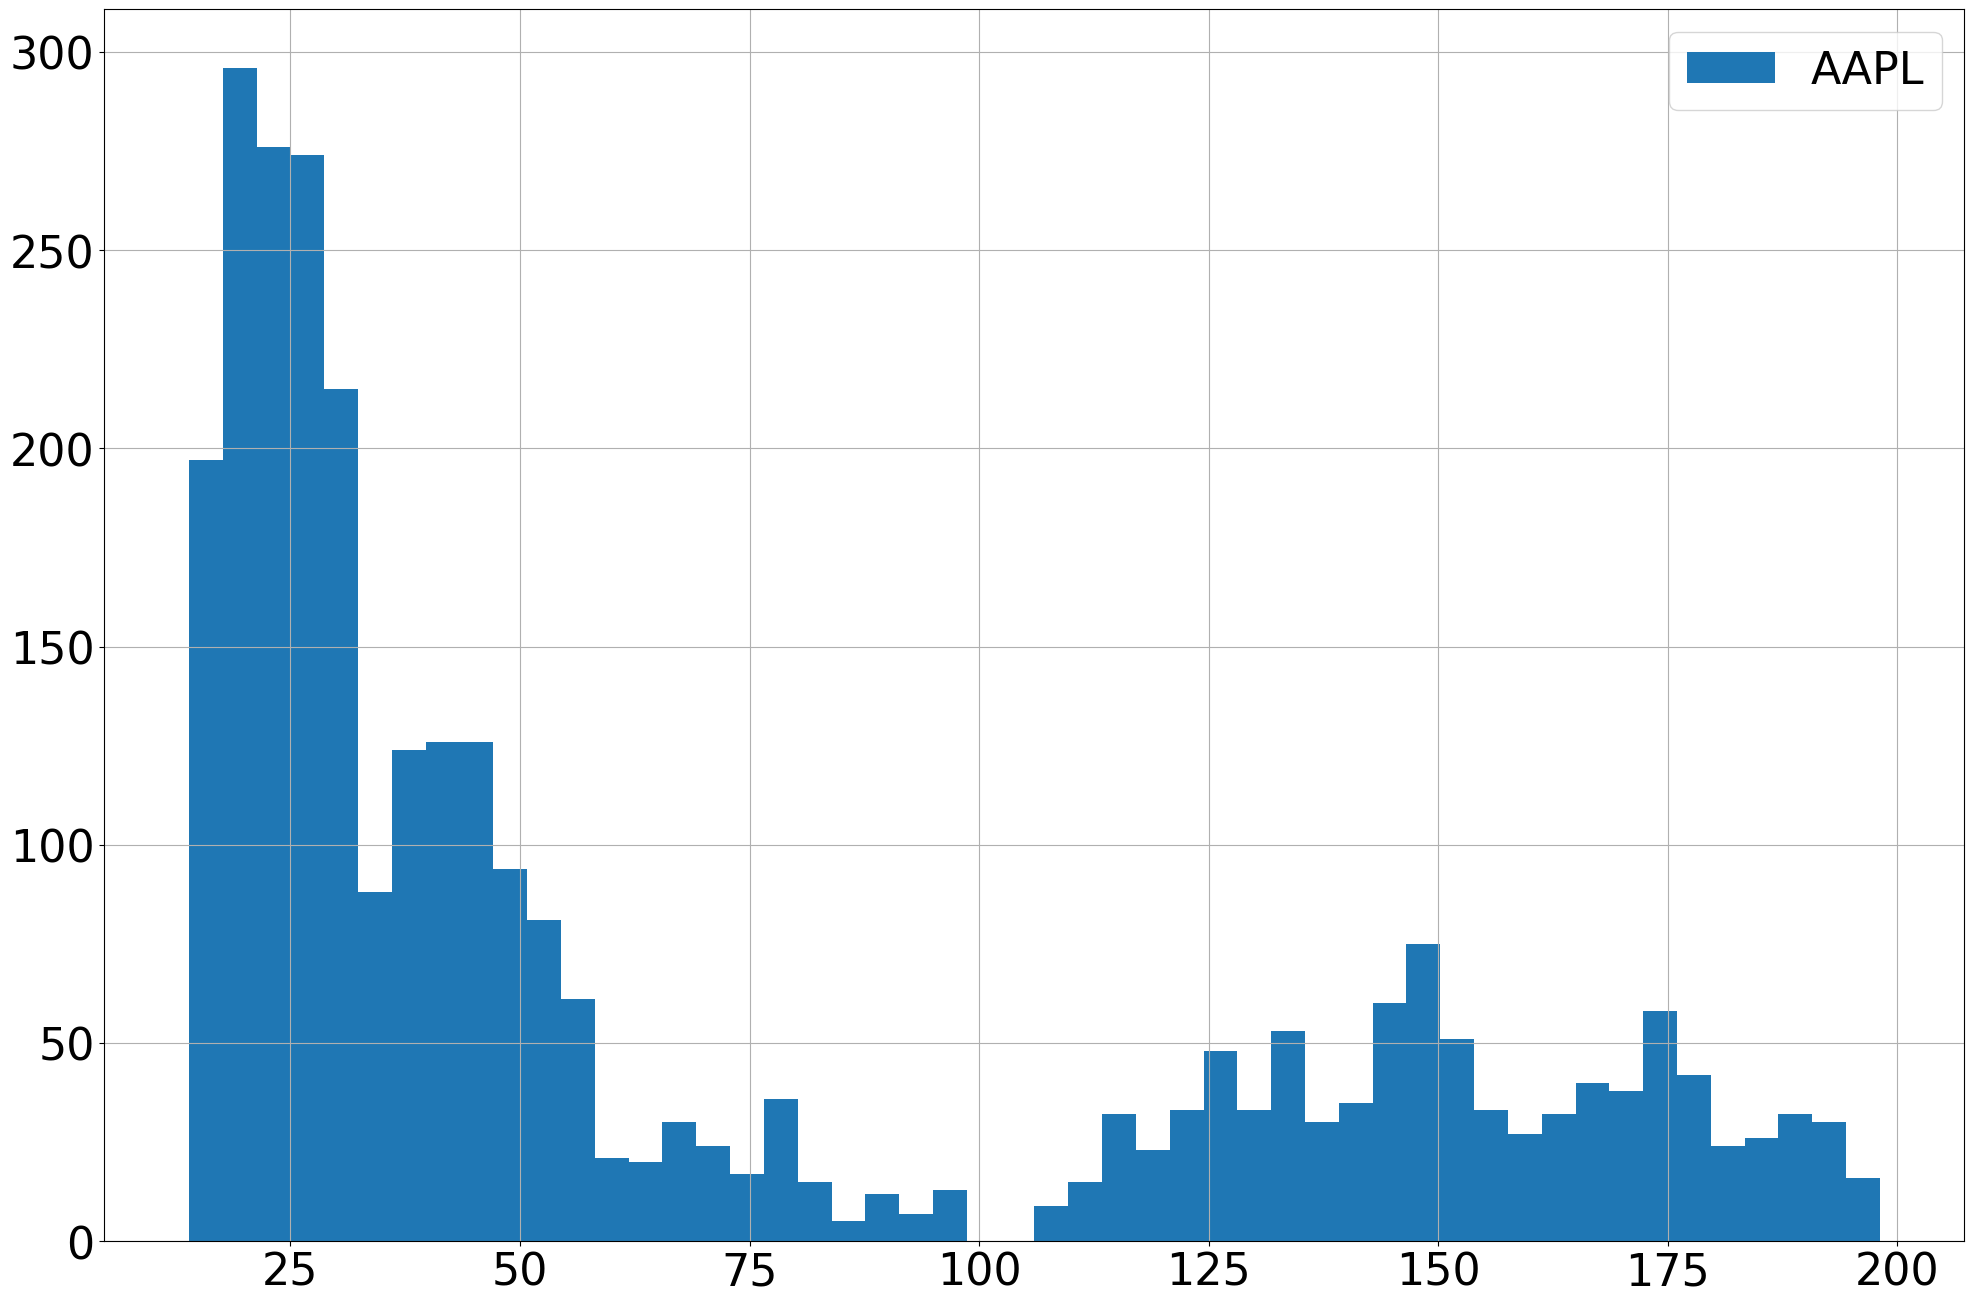

In [11]:
fig, ax = plt.subplots(figsize = (24,16))
close_data["AAPL"].hist(bins = 50, label = "AAPL")
plt.legend()

C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\1141904978.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  close_data.hist(bins = 50, alpha = 0.5, ax = ax)


array([[<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'AAPL'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'TSLA'}>]],
      dtype=object)

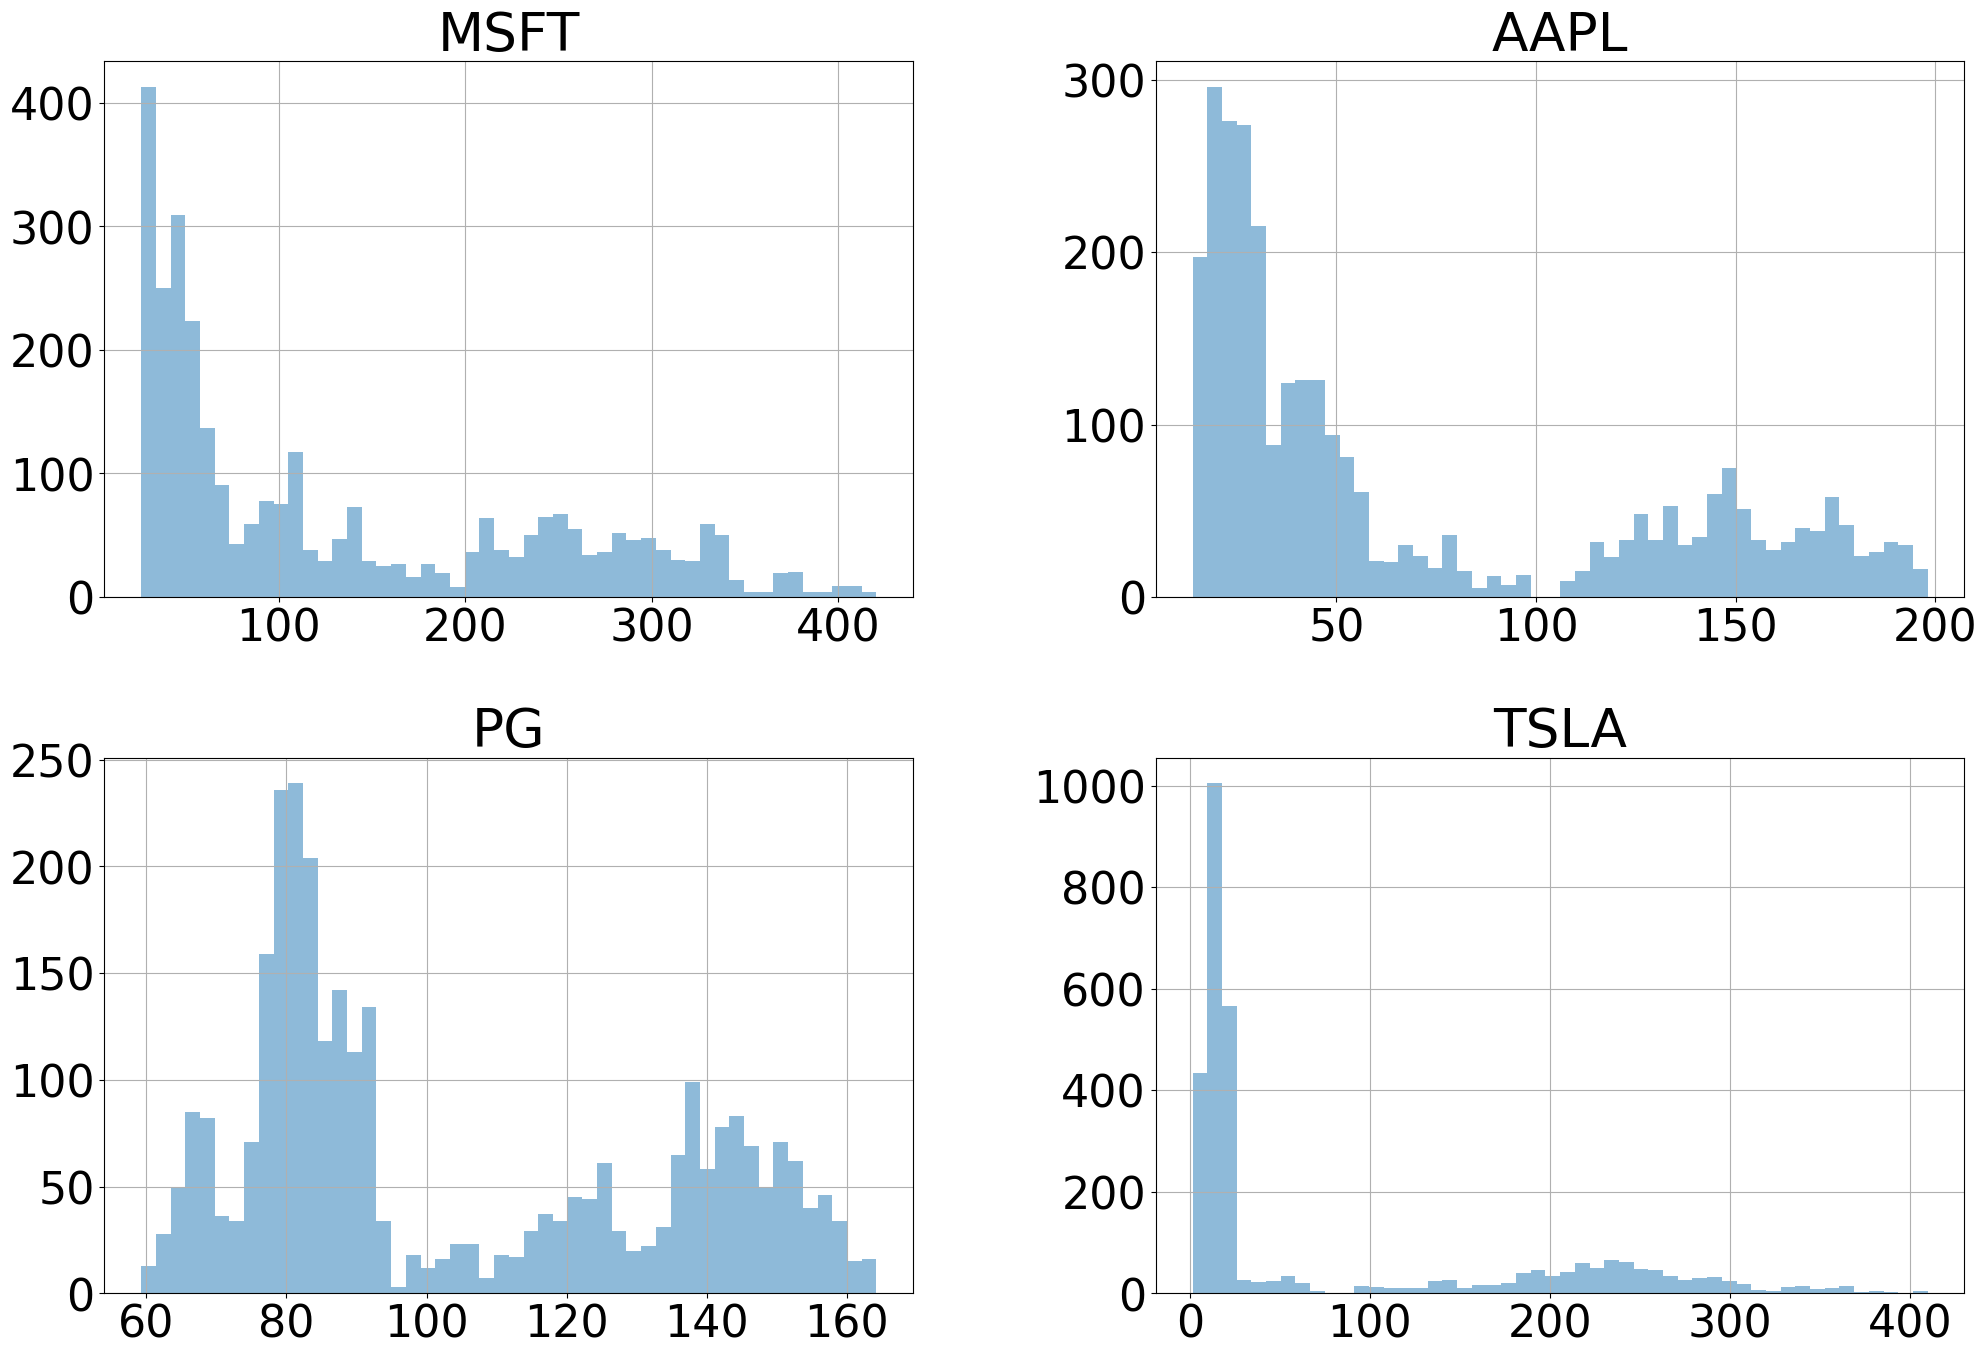

In [12]:
fig, ax = plt.subplots(figsize = (24,16))
close_data.hist(bins = 50, alpha = 0.5, ax = ax)

### Log the data so that changes in the data are approximate percent changes (ie. proportional)

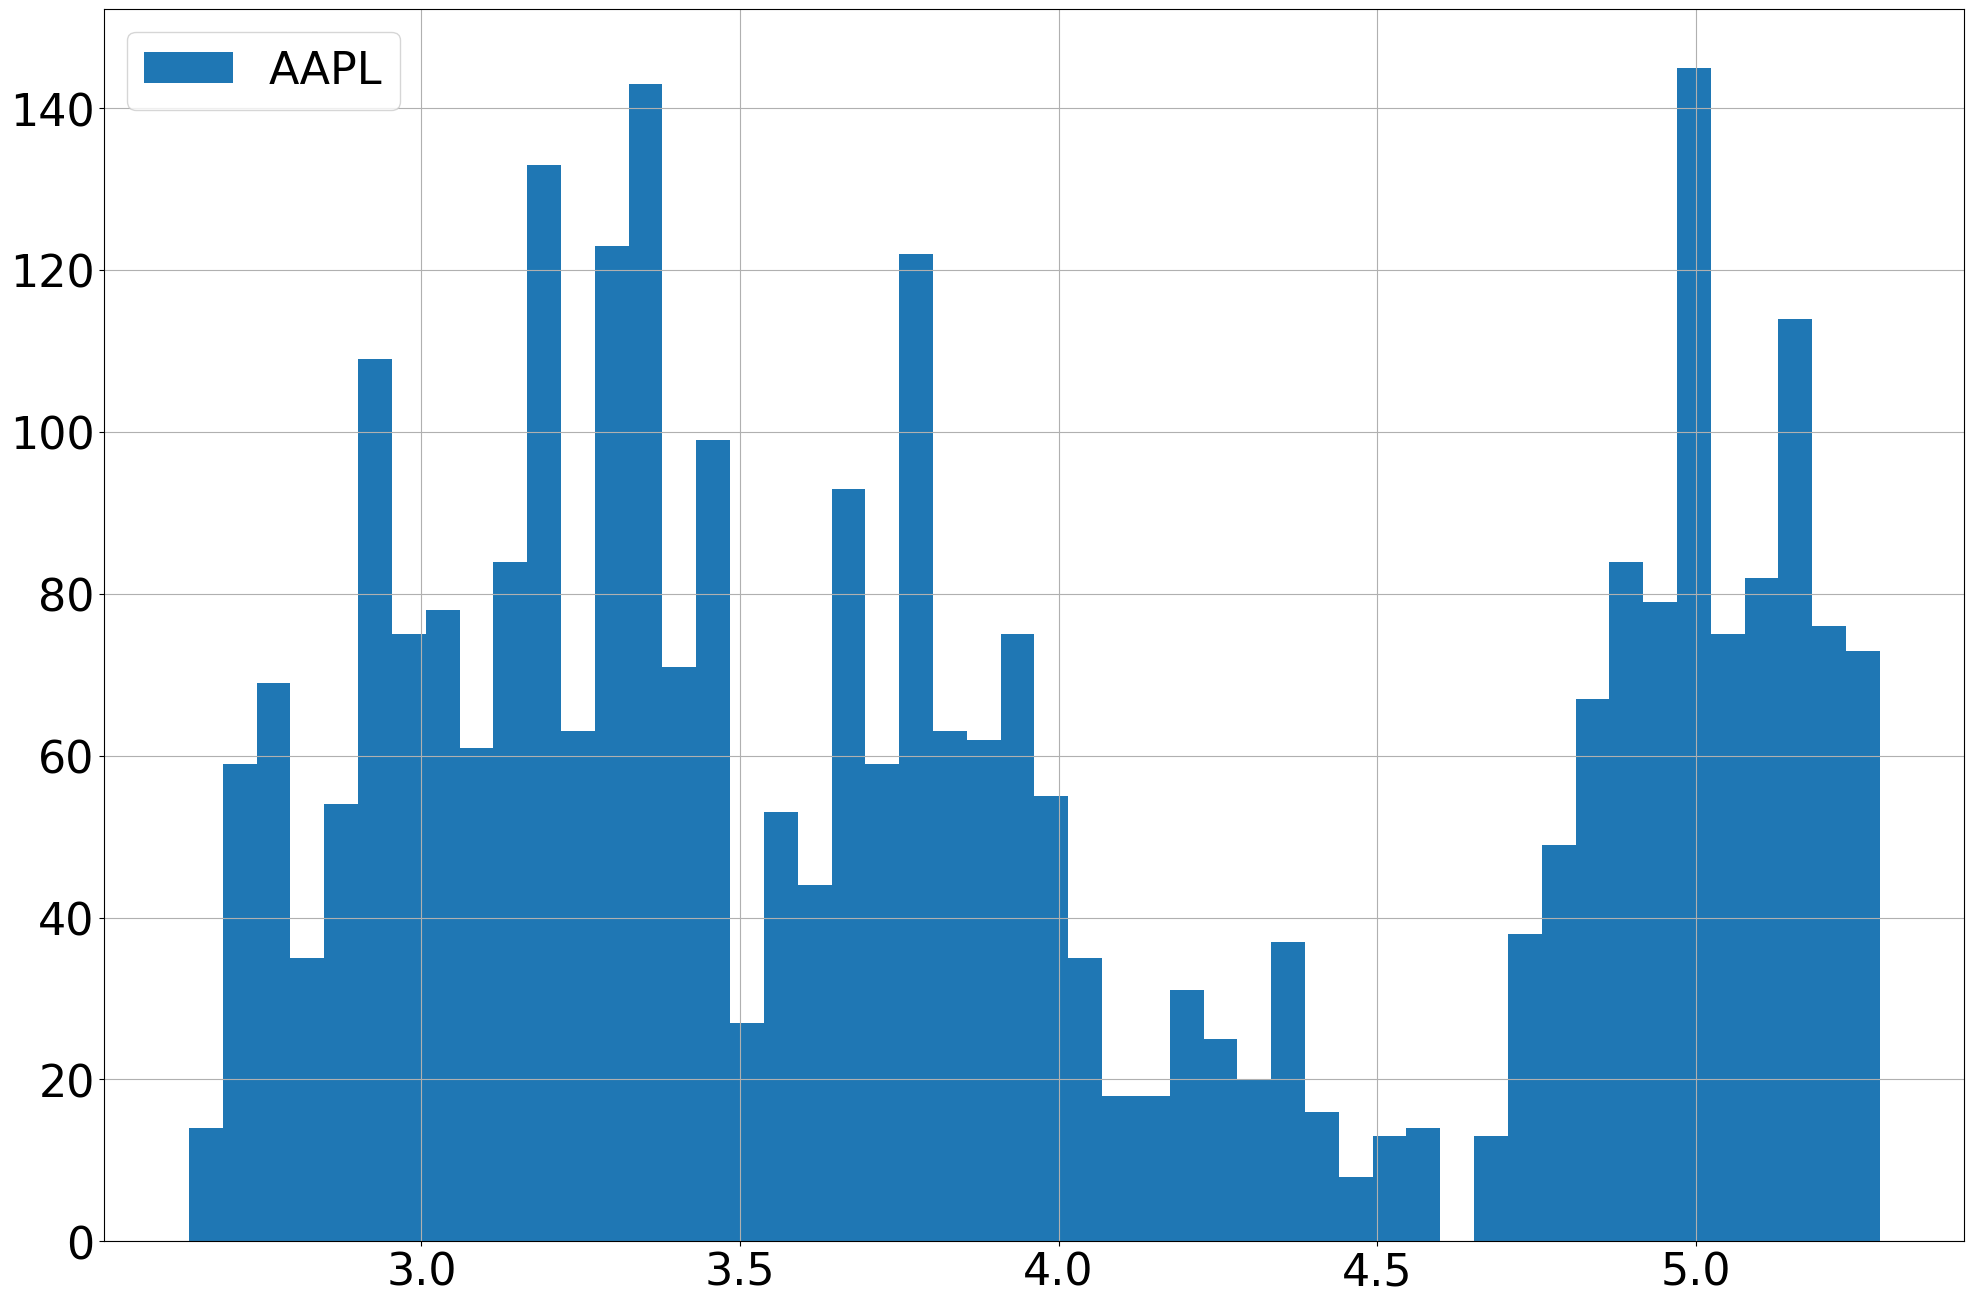

In [13]:
import numpy as np
log_data = np.log(close_data)
fig, ax = plt.subplots(figsize = (24, 16))
log_data["AAPL"].hist(bins = 50, label = "AAPL")
plt.legend()

In [14]:
def graph_yearly_distribution(data, key):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = (24,16))
    for year in years:
        color = "C"+str(year%12)
        year = str(year)
        plot_data = data.loc[year, key]
        plot_data.hist(bins = 20, color = color,
                      label = year,
                      alpha = 0.6,
                      ax = ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
    ax.set_title(key)
    ax.legend(bbox_to_anchor = (-0.05,1))

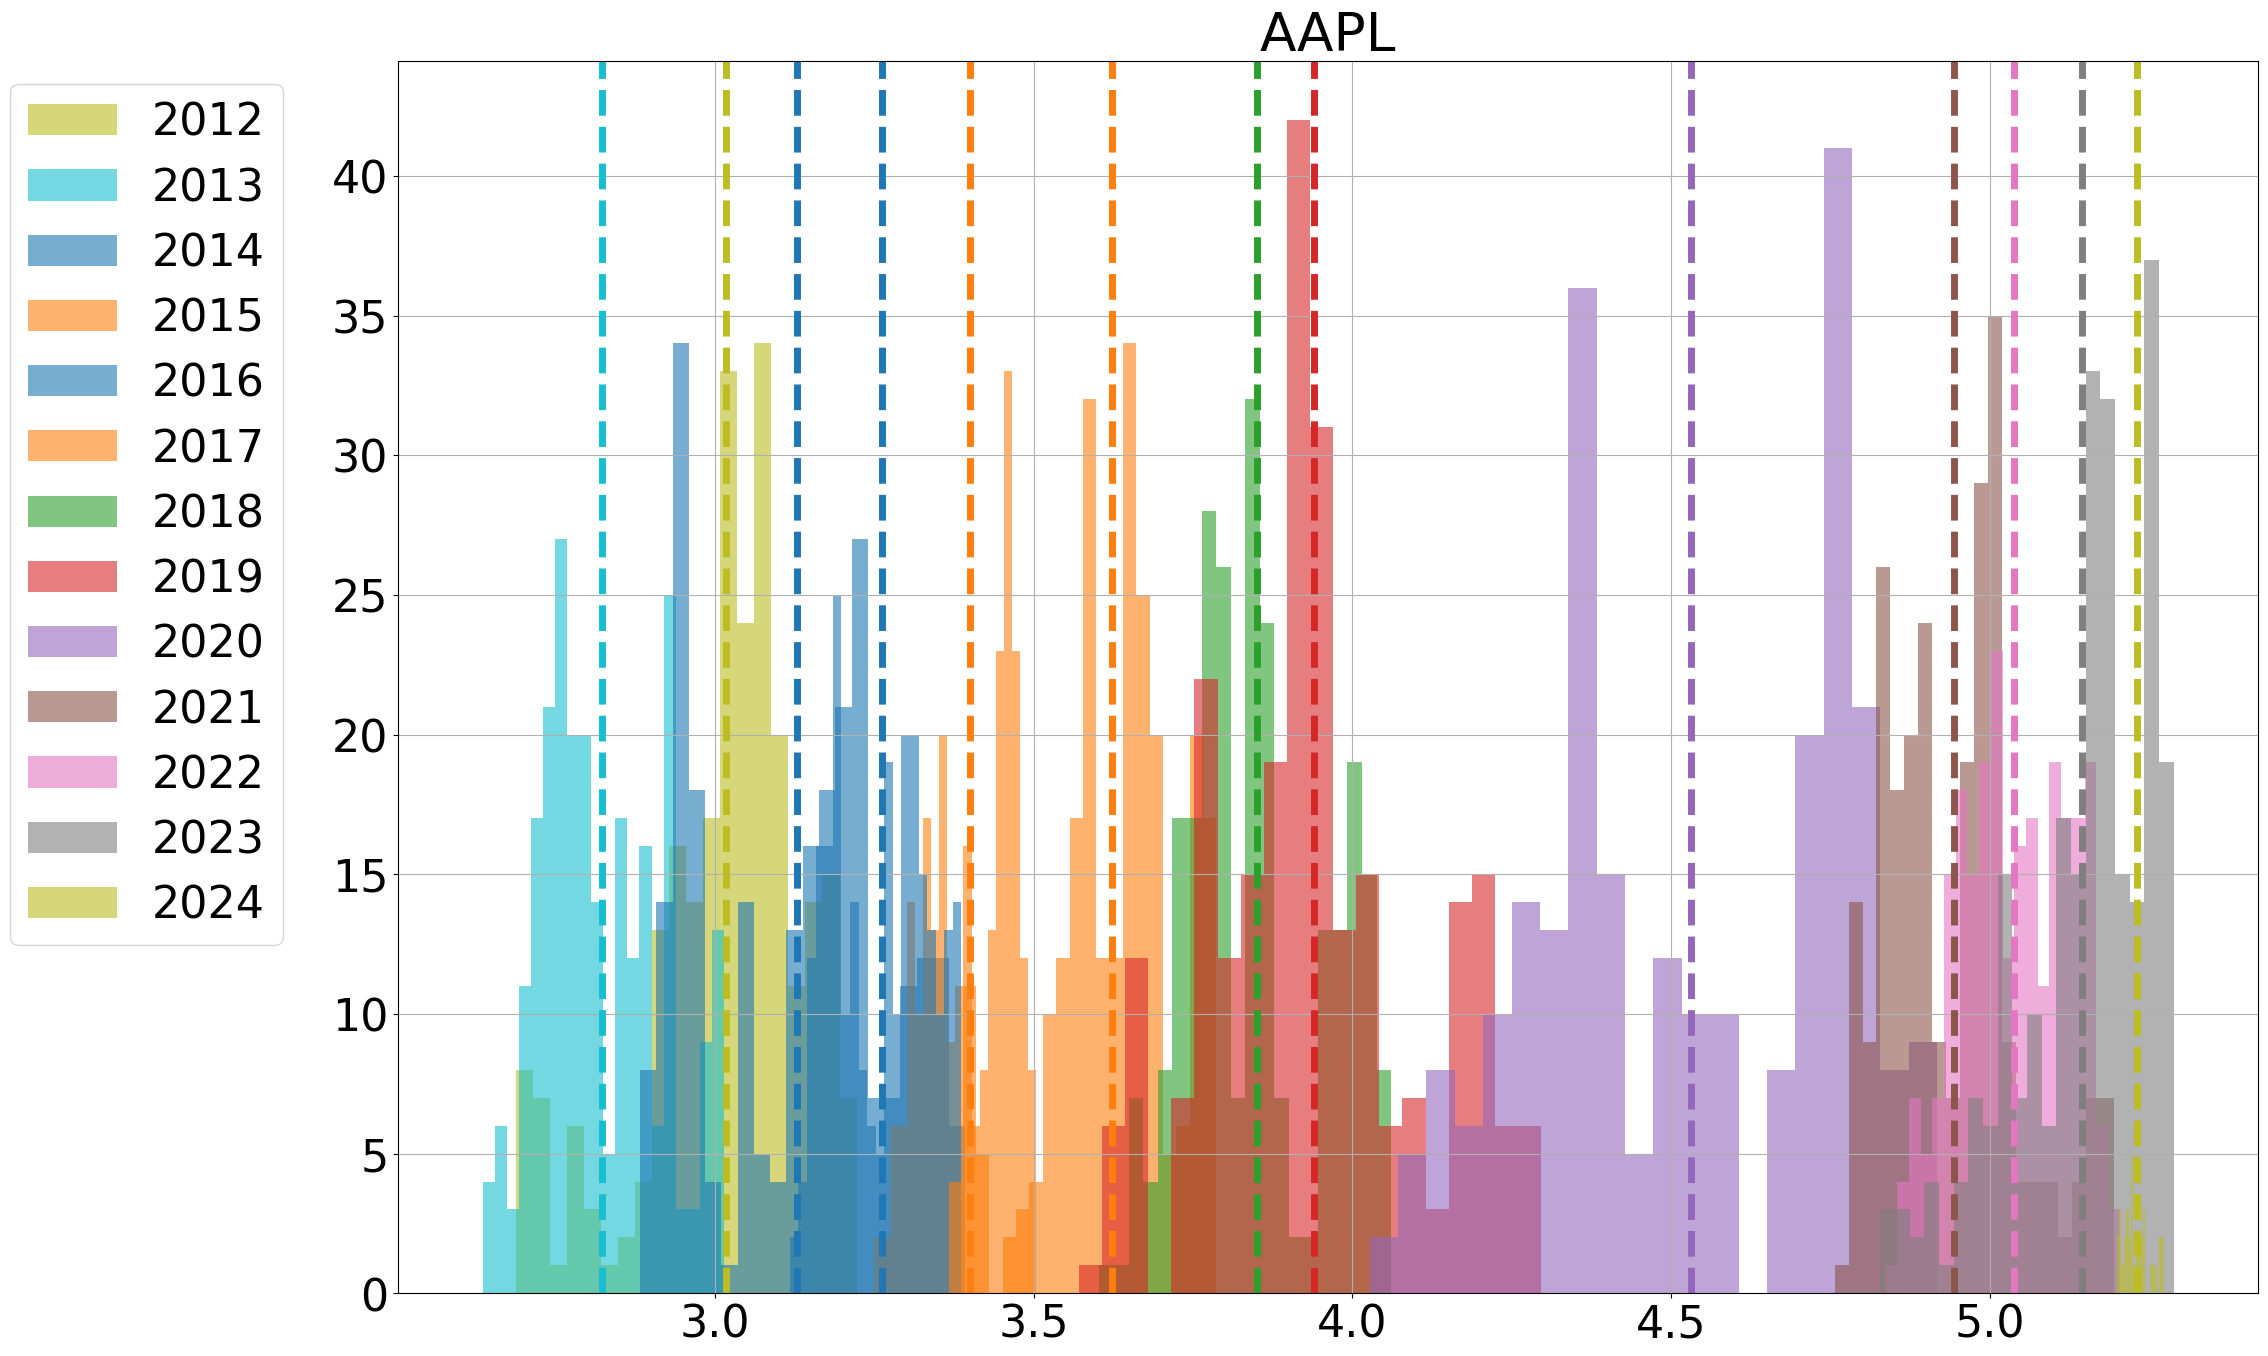

In [15]:
graph_yearly_distribution(log_data, "AAPL")

In [16]:
price_change_data =log_data.diff().mul(100).dropna()
price_change_data.to_csv("StockData.csv")

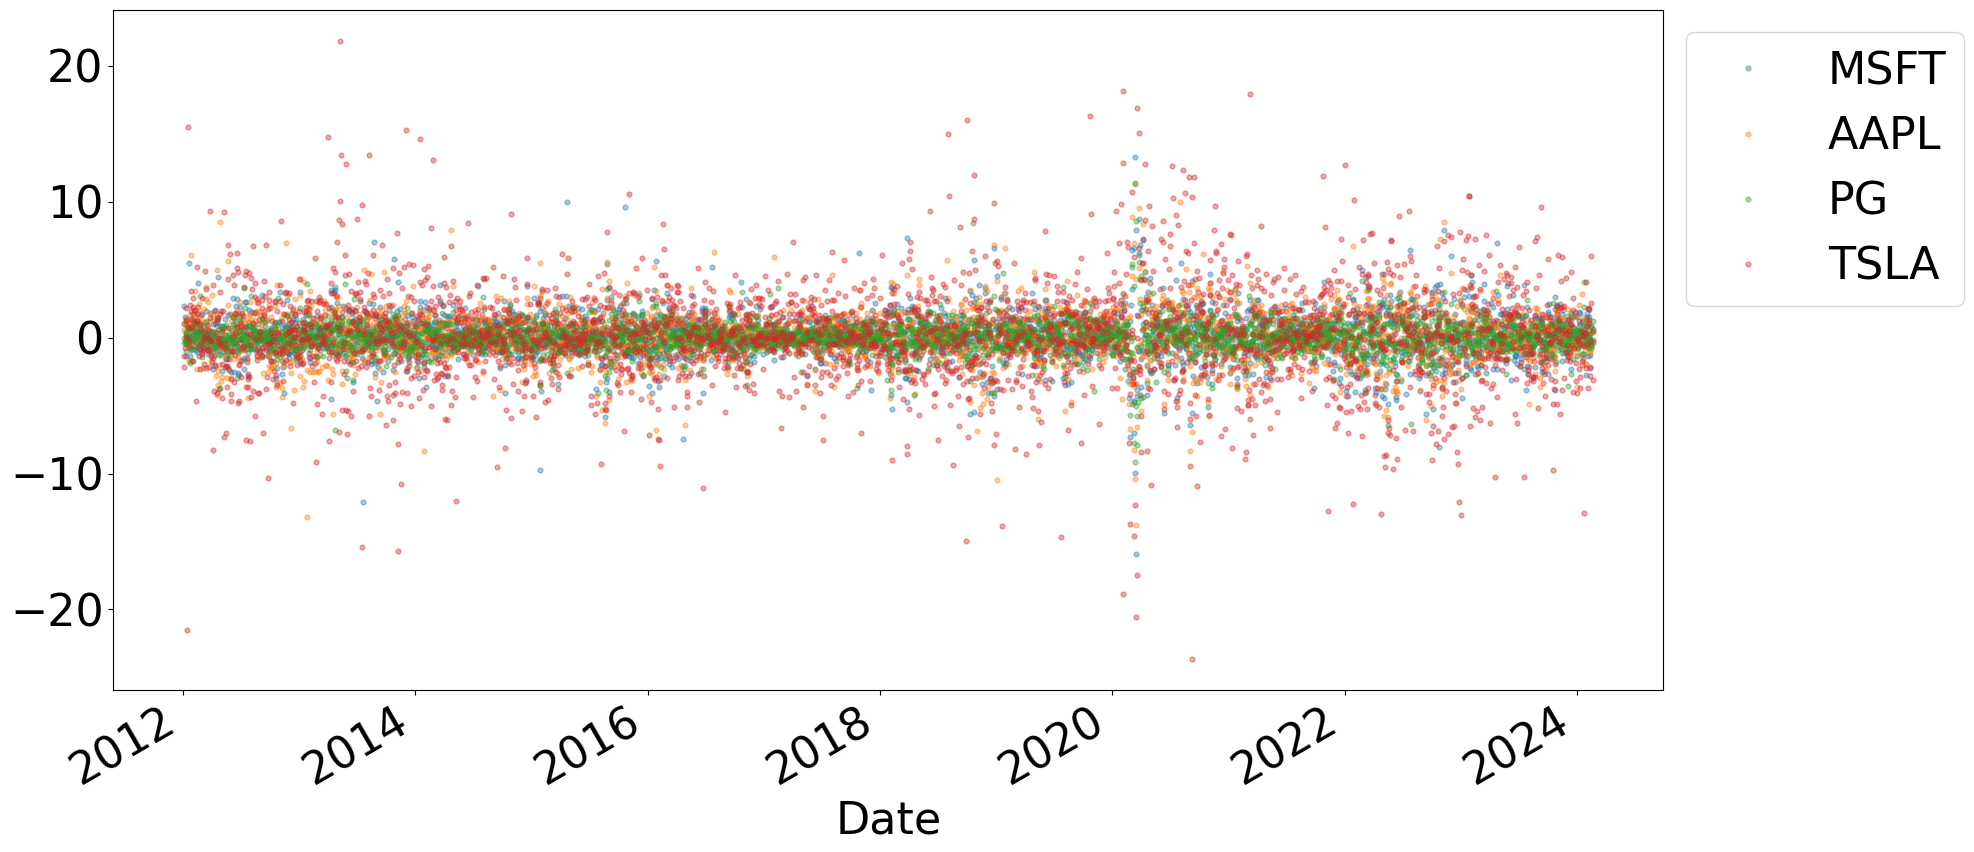

In [17]:
fig, ax = plt.subplots(figsize = (20,10))
price_change_data.plot.line(marker = ".", ls = "",
                           ax = ax,
                           markersize = 7,
                           alpha = .4,
                           legend = False)
ax.legend(bbox_to_anchor = (1,1))

In [18]:
from stats import *
stats_df = gather_statistics(price_change_data,
                            sample = True).round(2)
stats_df

,MSFT,AAPL,PG,TSLA
mean,0.09,0.08,0.03,0.15
median,0.07,0.08,0.04,0.13
variance,2.76,3.21,1.25,12.60
S.D.,1.66,1.79,1.12,3.55
skewness,-0.20,-0.28,-0.03,-0.06
kurtosis,8.56,5.89,11.82,4.99


C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\3904633920.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])


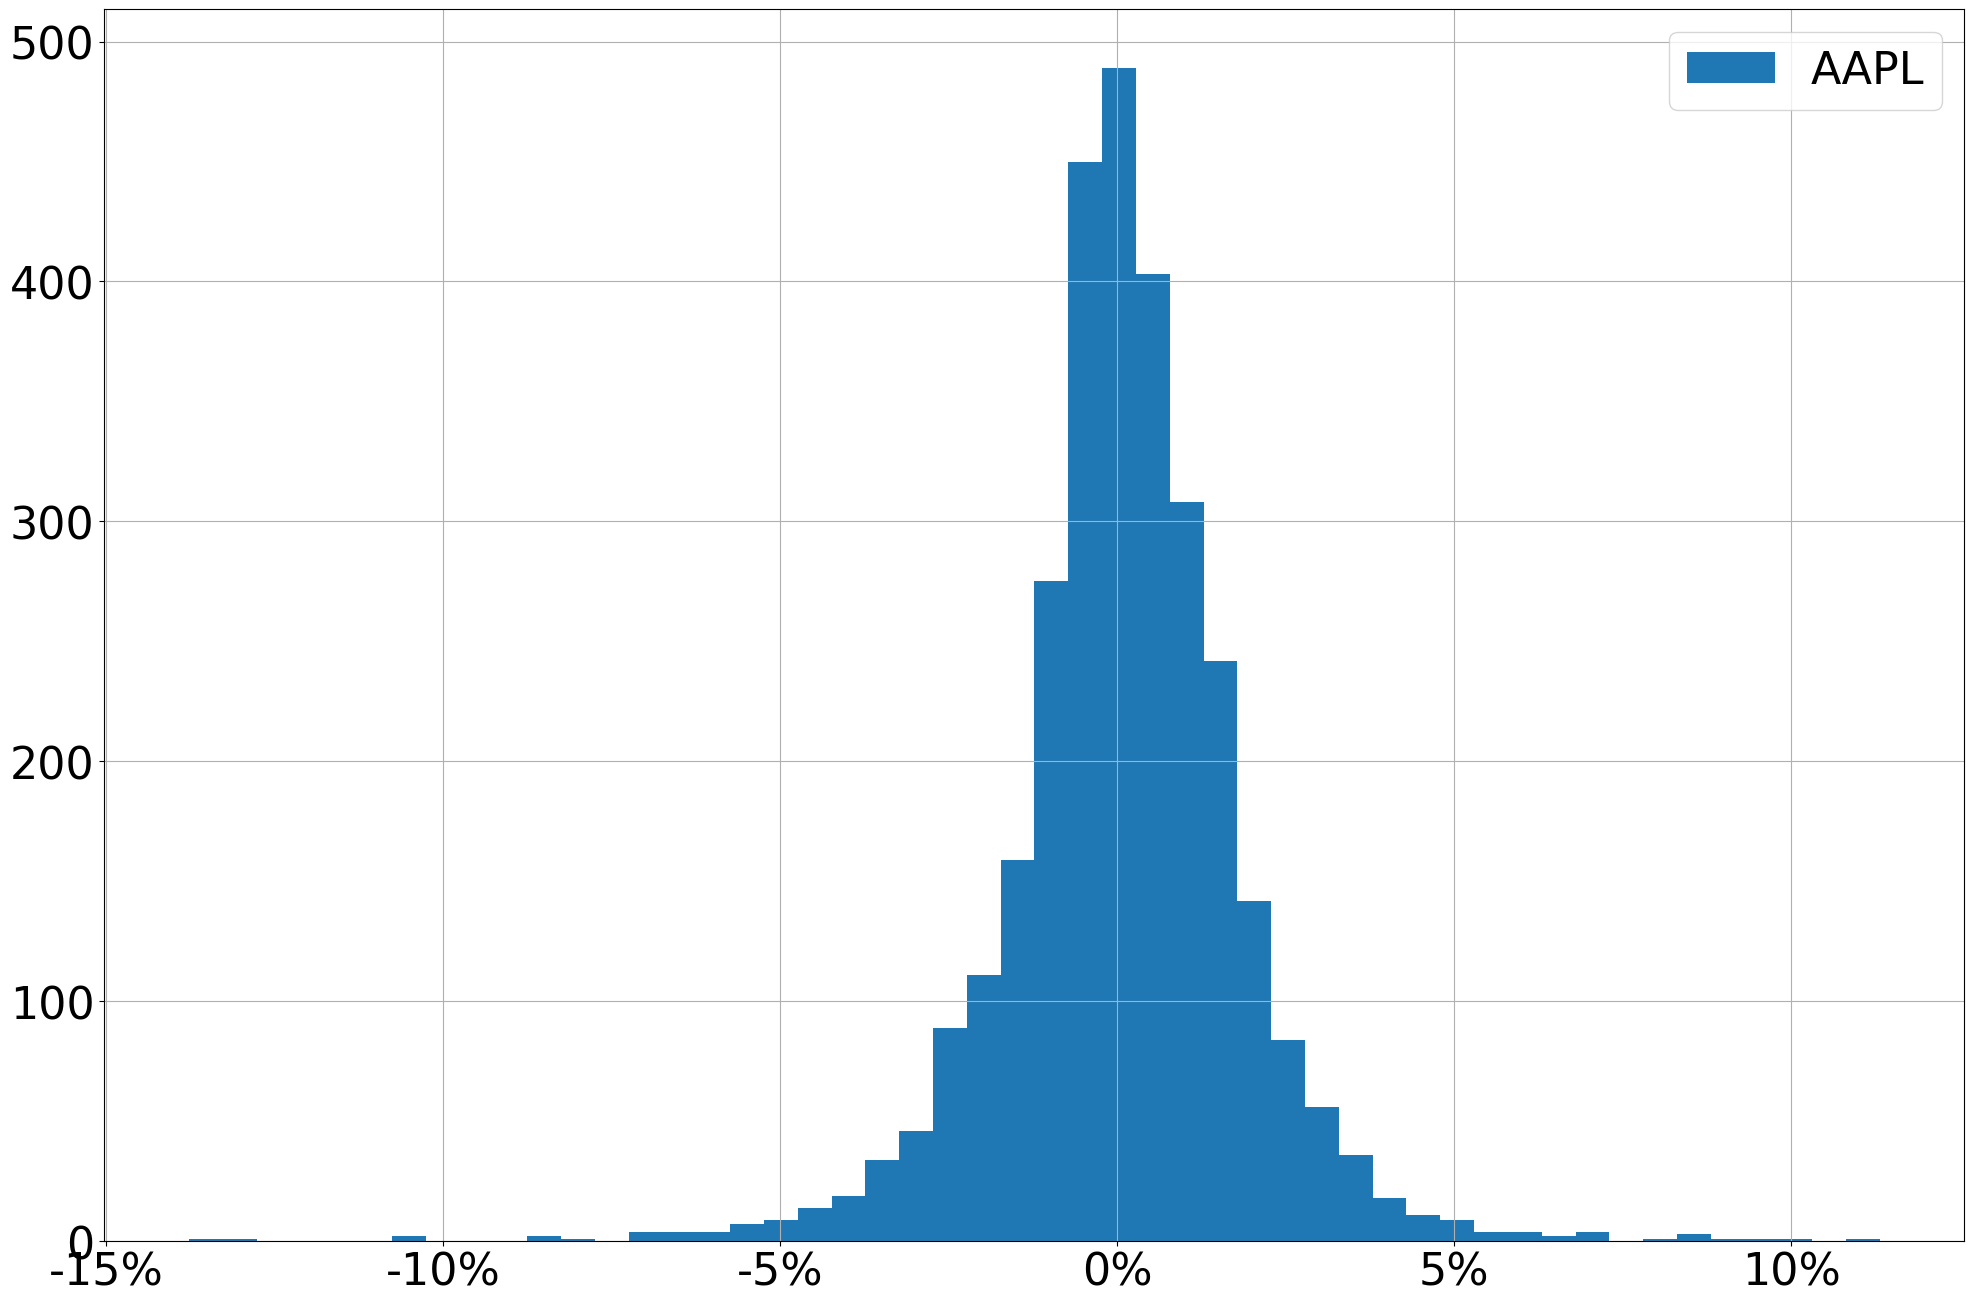

In [19]:
fig, ax = plt.subplots(figsize = (24,16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])
ax.legend()

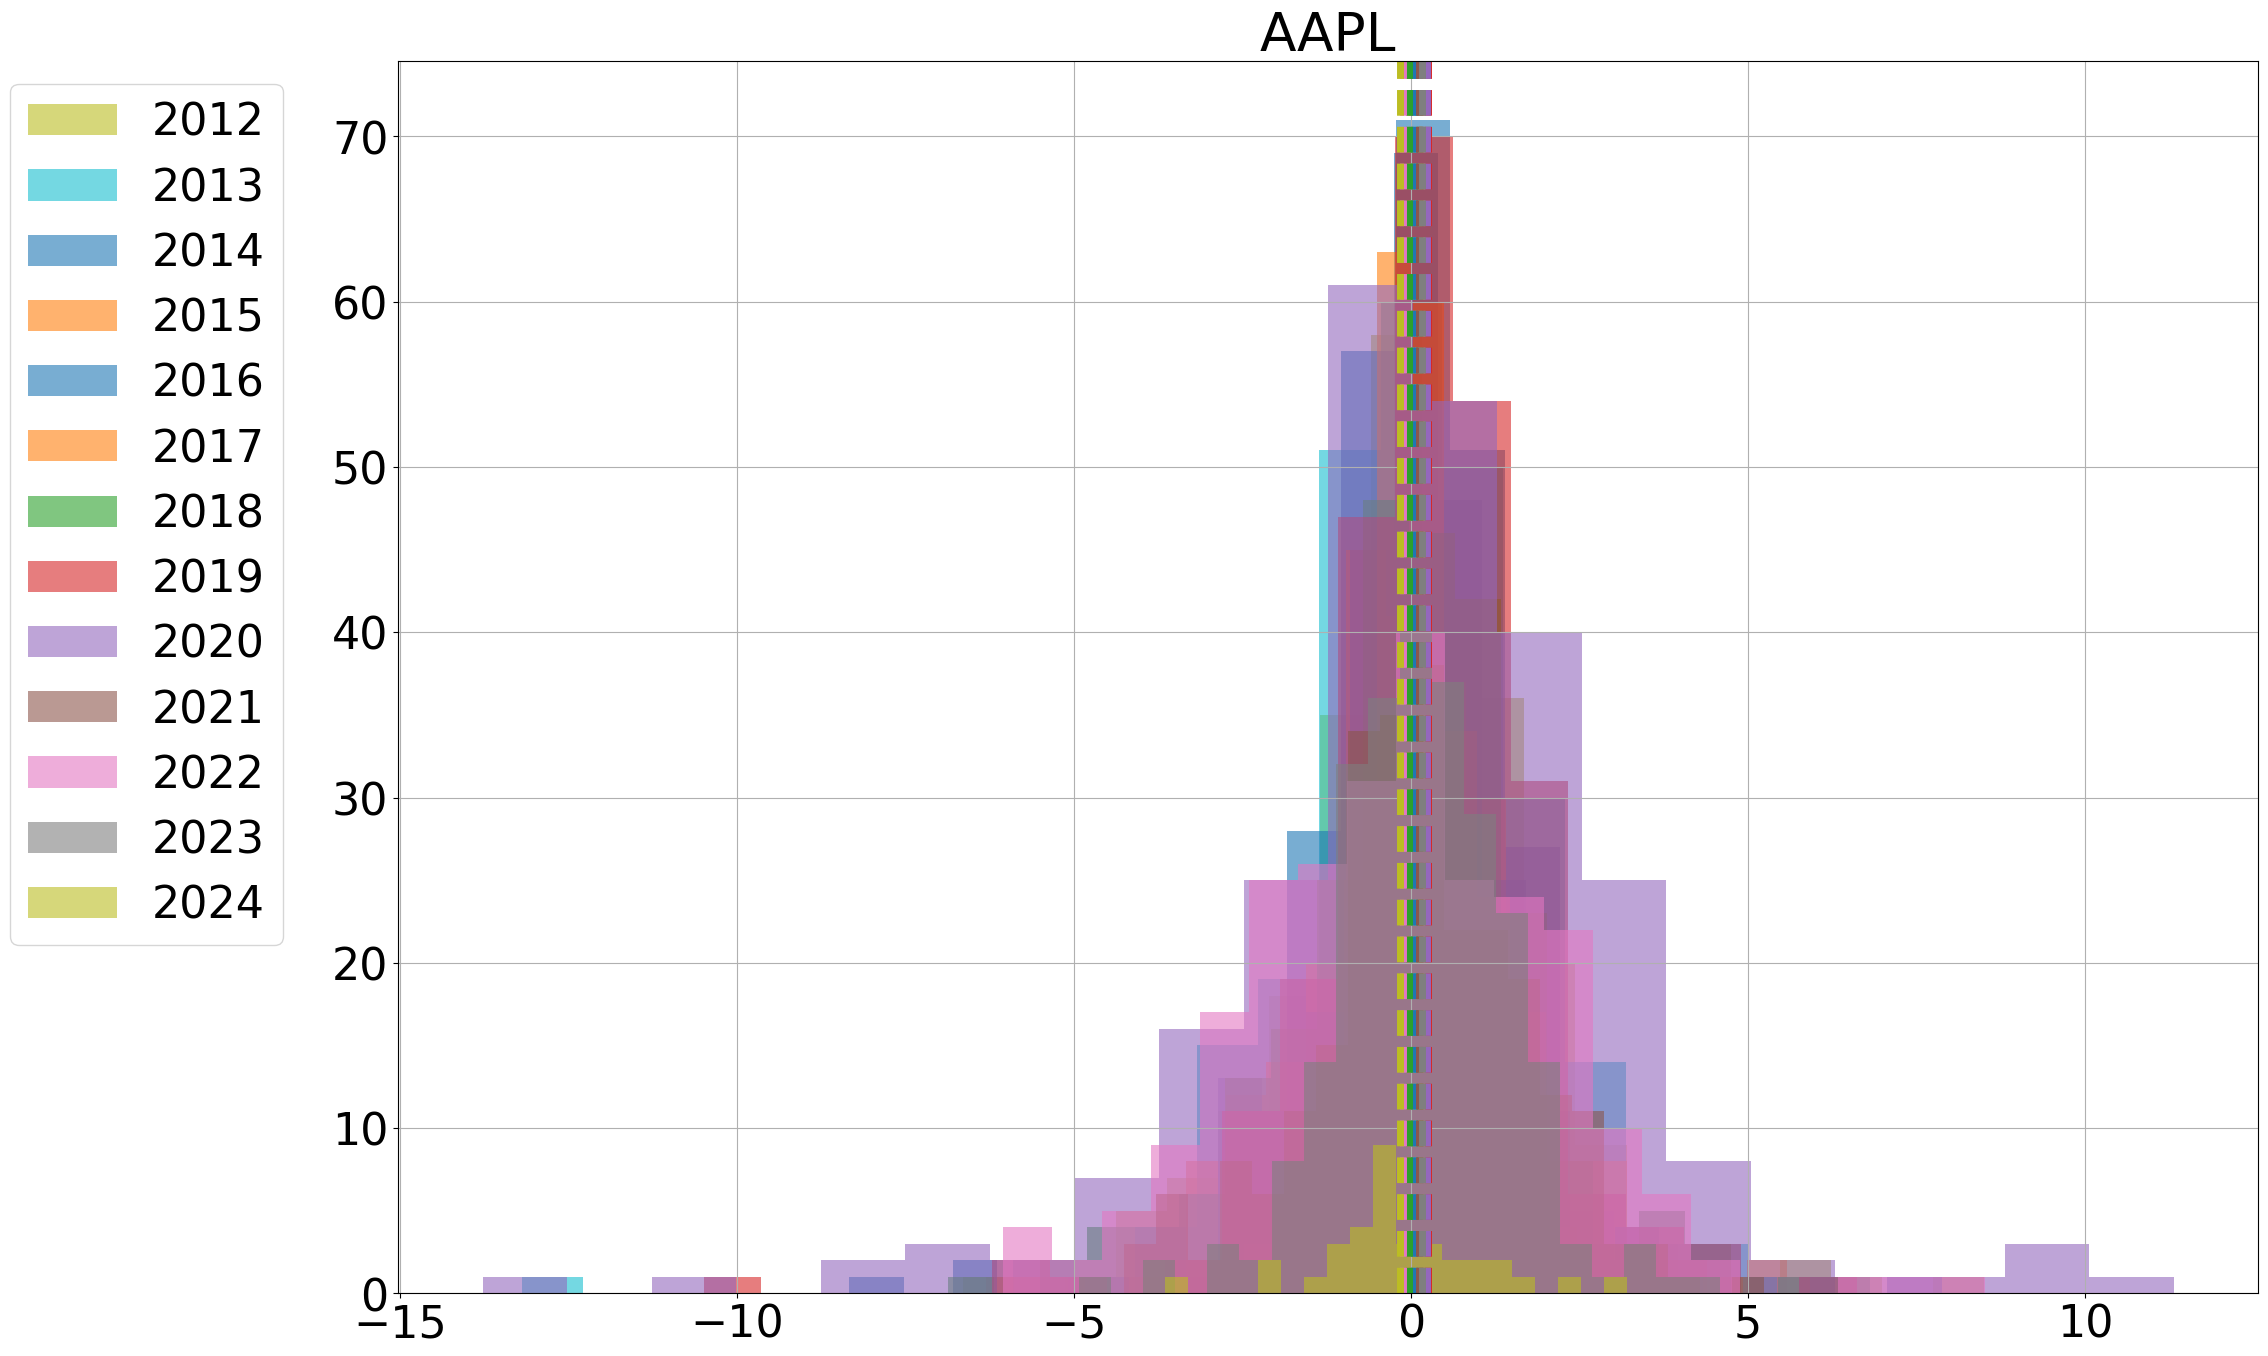

In [20]:
graph_yearly_distribution(price_change_data, "AAPL")

C:\Users\aleah\AppData\Local\Temp\ipykernel_21728\98562901.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  price_change_data.hist(alpha = .5,


array([[<Axes: title={'center': 'MSFT'}>,
        <Axes: title={'center': 'AAPL'}>],
       [<Axes: title={'center': 'PG'}>, <Axes: title={'center': 'TSLA'}>]],
      dtype=object)

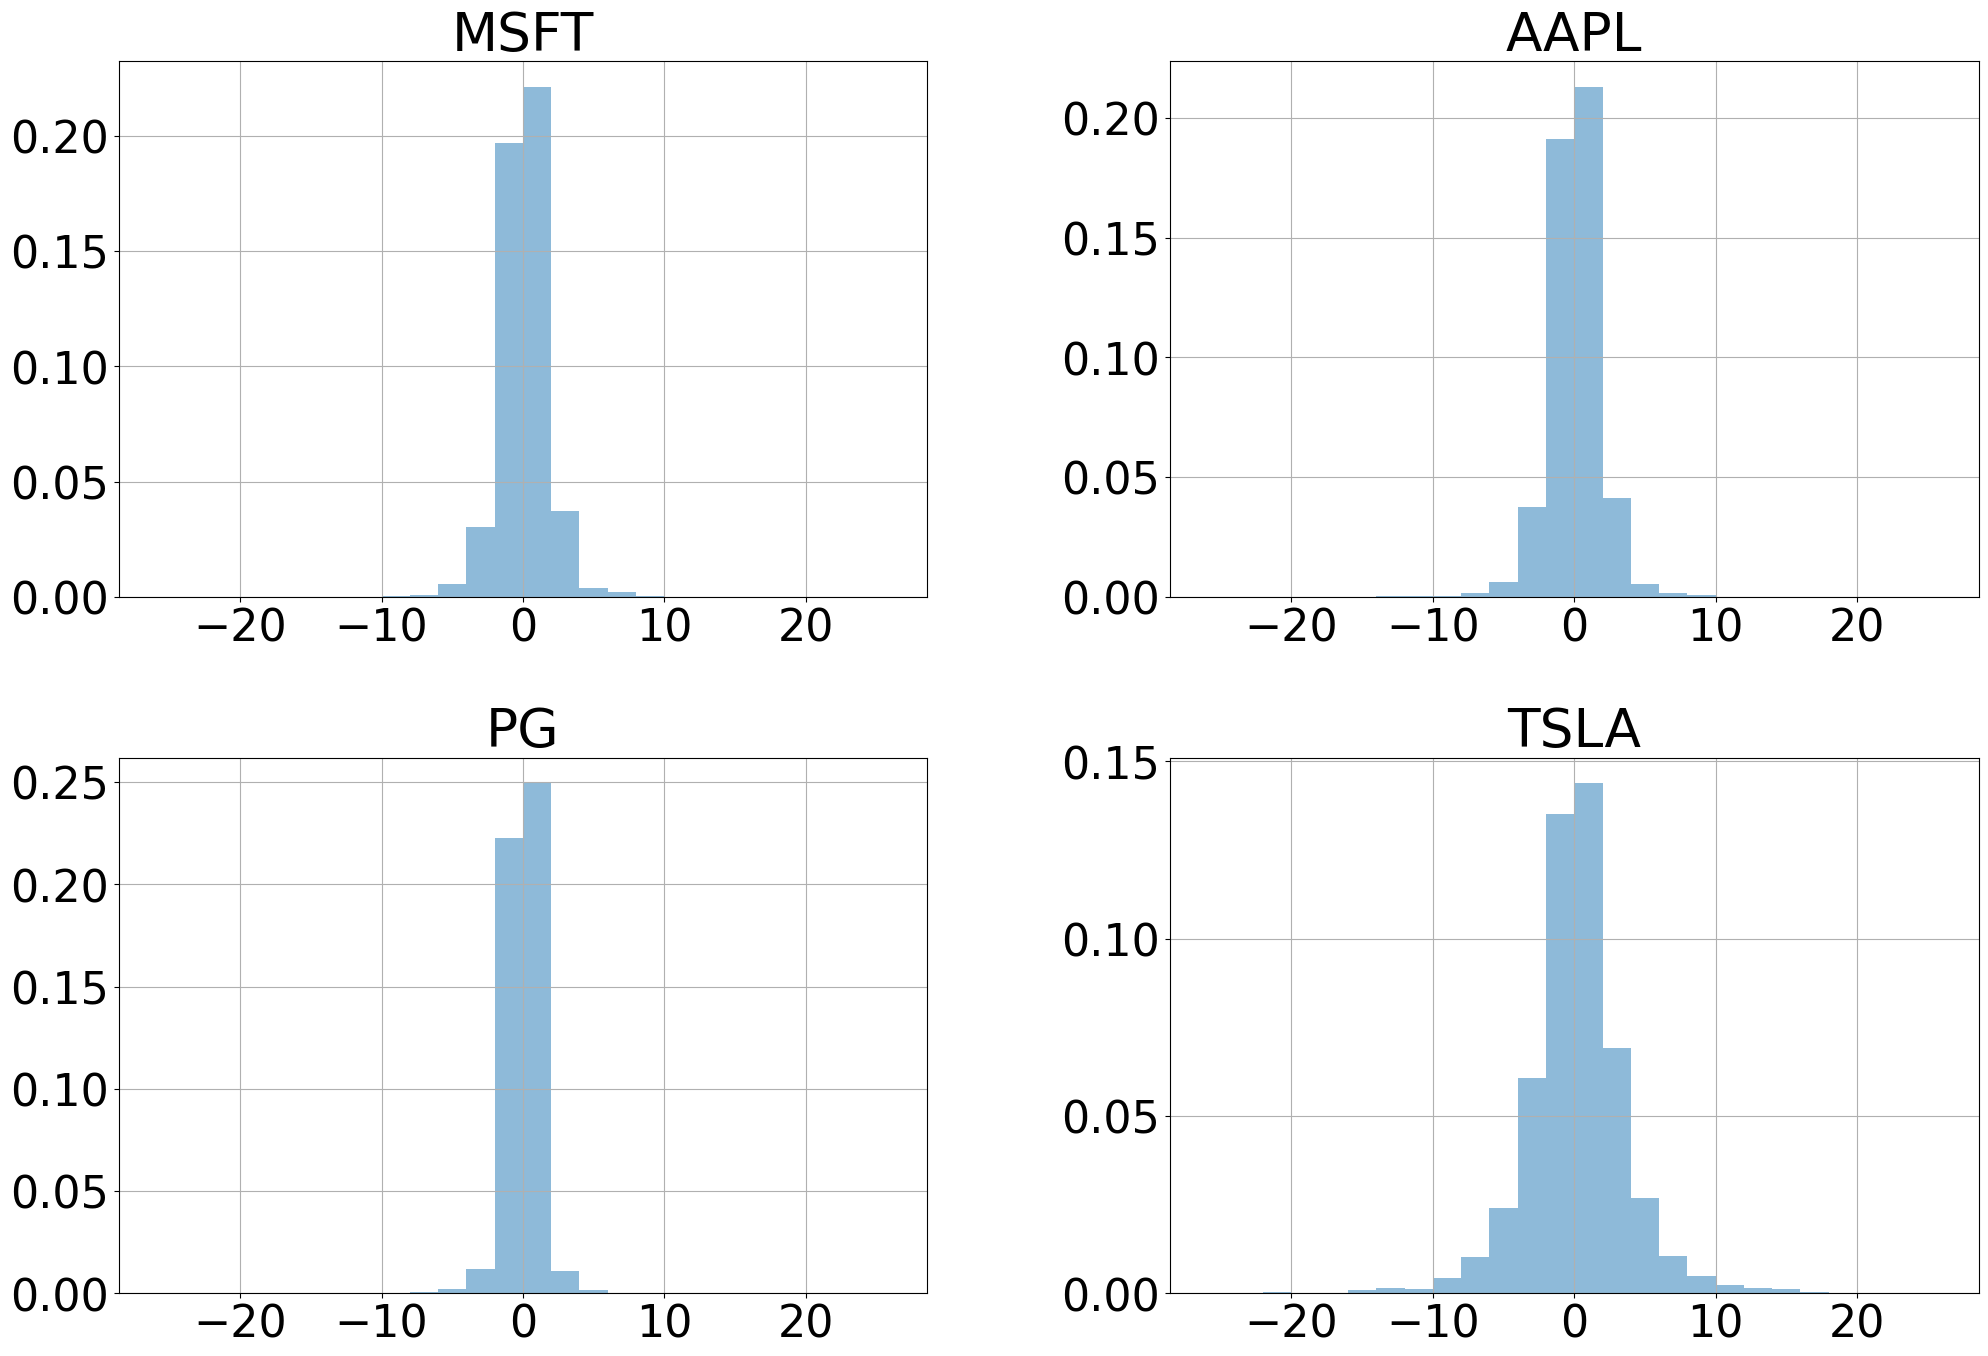

In [21]:
fig, ax = plt.subplots(figsize = (24,16))
# for key in price_change_data:
price_change_data.hist(alpha = .5, 
                      ax = ax, 
                      density = True,
                      bins = [i for i in range(-26, 27, 2)])

[<Axes: title={'center': 'MSFT'}> <Axes: title={'center': 'AAPL'}>]
MSFT Axes(0.125,0.545217;0.336957x0.334783)
mean        0.09
median      0.07
variance    2.76
S.D.        1.66
skewness   -0.20
kurtosis    8.56
Name: MSFT, dtype: float64
AAPL Axes(0.563043,0.545217;0.336957x0.334783)
mean        0.08
median      0.08
variance    3.21
S.D.        1.79
skewness   -0.28
kurtosis    5.89
Name: AAPL, dtype: float64
[<Axes: title={'center': 'PG'}> <Axes: title={'center': 'TSLA'}>]
PG Axes(0.125,0.11;0.336957x0.334783)
mean         0.03
median       0.04
variance     1.25
S.D.         1.12
skewness    -0.03
kurtosis    11.82
Name: PG, dtype: float64
TSLA Axes(0.563043,0.11;0.336957x0.334783)
mean         0.15
median       0.13
variance    12.60
S.D.         3.55
skewness    -0.06
kurtosis     4.99
Name: TSLA, dtype: float64


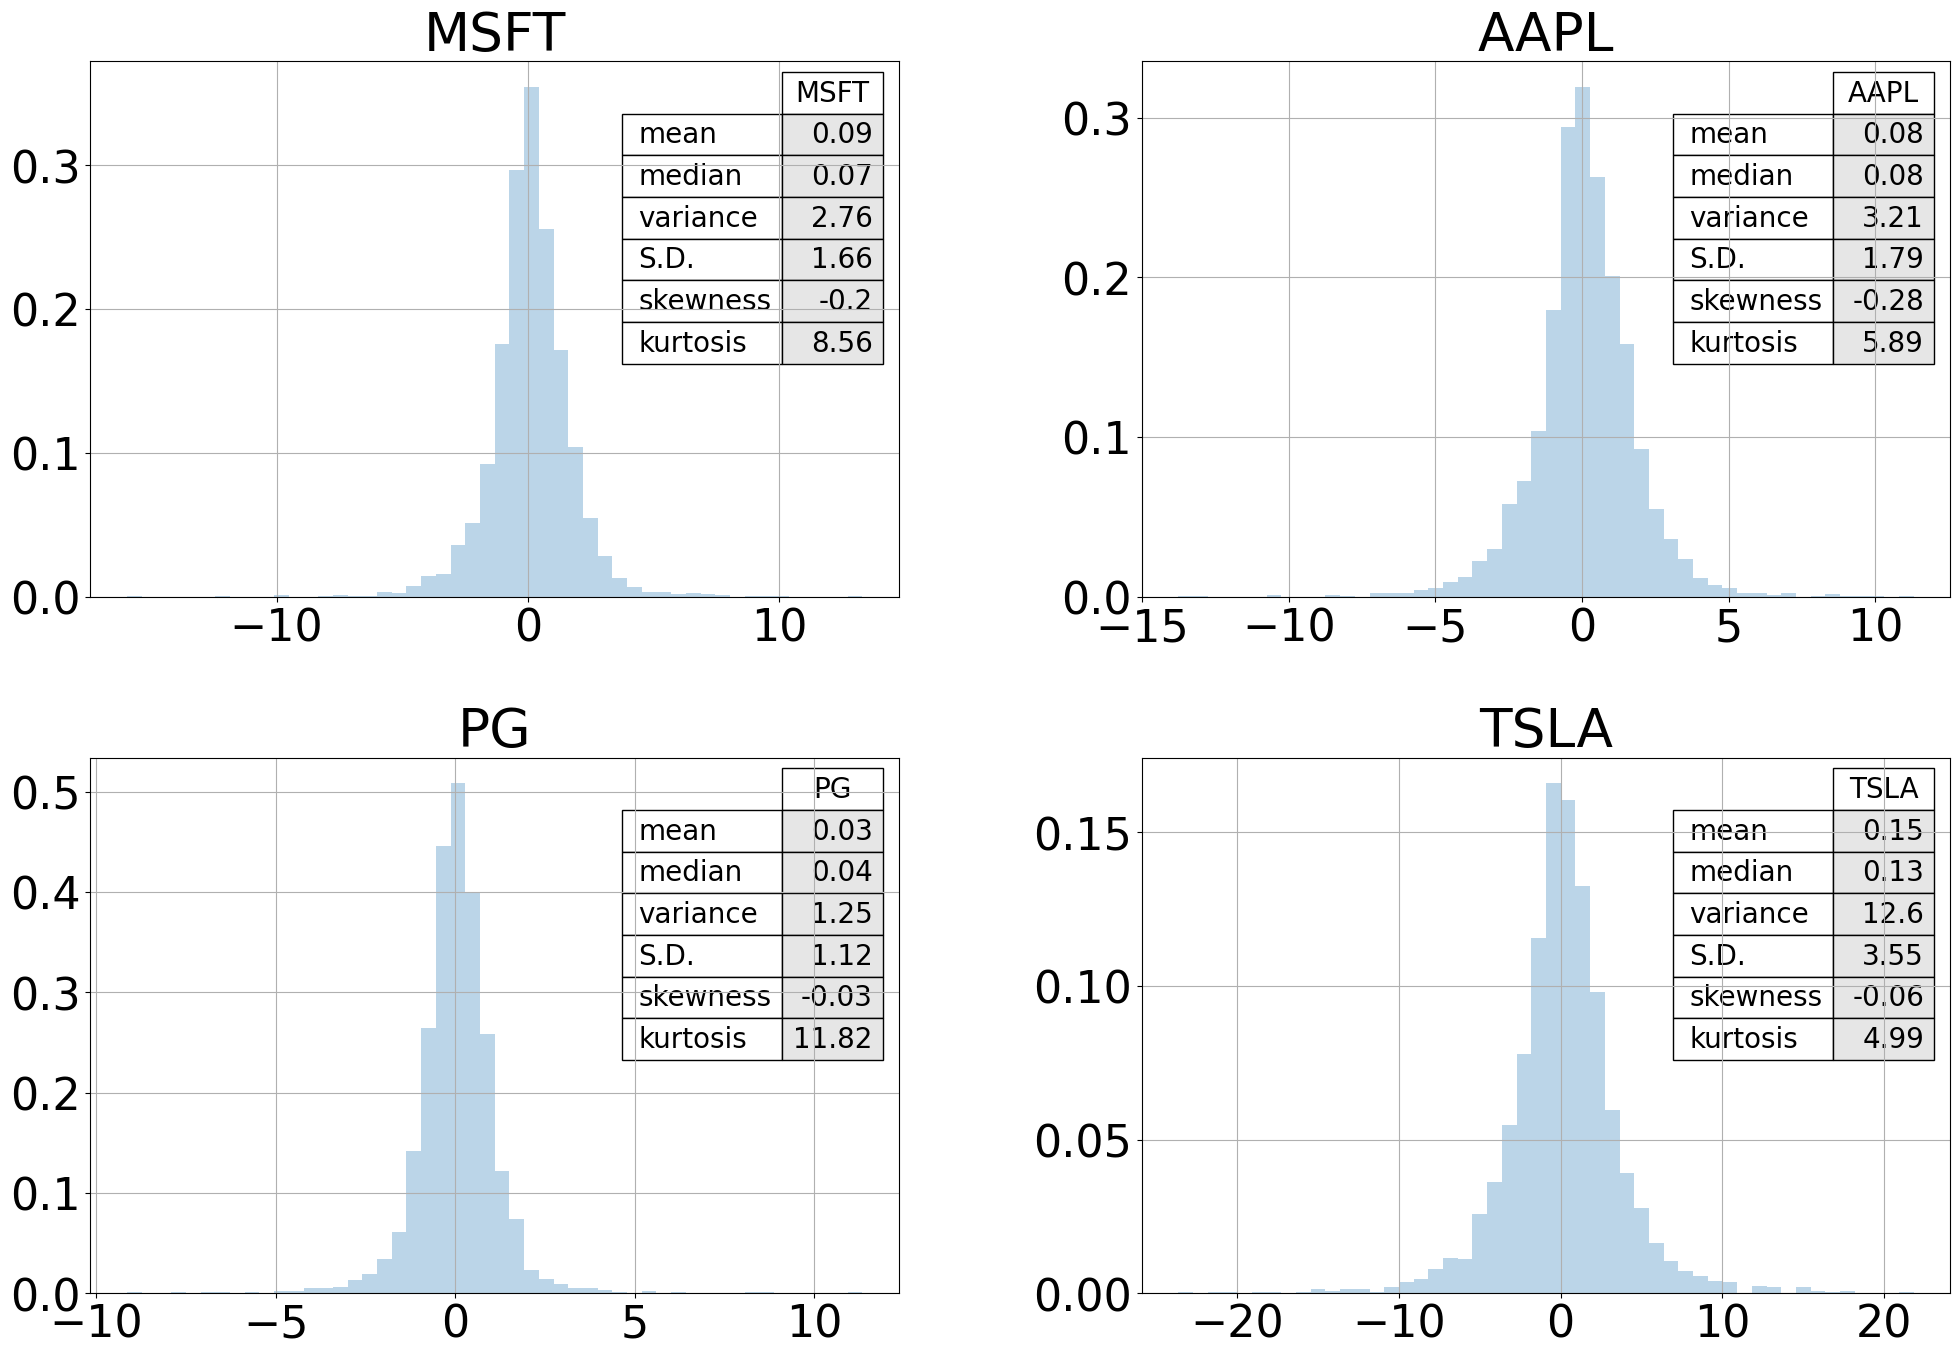

In [26]:
from pandas.plotting import table

# plot with 2 columns and 2 rows for subplots
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, 
                       alpha = .3, 
                       label = price_change_data.keys(), 
                       ax = ax, 
                       density = True)

# plot table with summary statistics
# cycle through each row in ax
for i in range(len(ax)):
    print(ax[i])
    for j in range(len(ax[i])):
    # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        print(stock,a)
        # save summary statistics data
        hist_data = stats_df[stock] 
        print(hist_data)
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, 
                     colWidths=[.1], 
                     cellColours=[[(.9,.9,.9)]]*6, 
                     loc = "upper right")
        stats.scale(1.25,2.5)
#        stats.auto_set_font_size(False)
#        stats.set_fontsize(20)

In [23]:
ax[0][0], ax[0][1], ax[1][0], ax[1][1]

(<Axes: title={'center': 'MSFT'}>,
 <Axes: title={'center': 'AAPL'}>,
 <Axes: title={'center': 'PG'}>,
 <Axes: title={'center': 'TSLA'}>)